# Introduction

As the world is moving towards ubiquitous digitization in the financial sector, the risk of fraud grows faster than ever, posing significant challenges to both financial instutions and customers. As a result, the need for robust fraud detection systems capable of identifying and mitigating fraudulent activities is more important than ever.

## Project Description
This notebook aims to provide a comprehensive exploratory data analysis on the Bank Fraud Detection Base dataset, published at NeurIPS 2022.

## Dataset Description
The dataset is available at https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data.

This synthetic tabular dataset comprises 1M instances, where each instance represents a credit card application. The dataset contains 31 features and a corresponding binary target variable indicating whether the application is fraudulent or not. The features cover various information associated with the applicant or the application. The dataset contains a combination of numerical and categorical features, and there are no missing values in the dataset. The dataset is highly imbalanced, with only ~1% of the instances labeled as fraudulent. The dataset is also generated based off real-world data to protect the privacy of potential applicants.

A detailed description of the dataset can be found on https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf.

## Notebook structure

This notebook contains the exploratory data analysis for the bank fraud detection dataset. It is split into multiple sections being 

1. Initial understanding of the data 
2. Analysis of numerical features 
3. Analysis of categorical features \
    3.1 Analyis of high-cardinality categorical features \
    3.2 Analysis of low-cardinality categorical features \
    3.3 Analysis of boolean features 
4. Conclusion and correlation between features

# 1. Data Collection

## 1.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1.2 Loading the Dataset

In [2]:
# Data collection
total_df = pd.read_csv('./Base.csv')

## 1.3 Preparing the Dataset for Analysis

In [3]:
# Split the DataFrame into training and test sets using stratified sampling to maintain anomaly distribution
train_df, test_df = train_test_split(total_df, test_size=0.2, stratify=total_df['fraud_bool'], random_state=42)

# Validate the size of the data
train_shape = train_df.shape
test_shape = test_df.shape
print(f"The training data has {train_shape[0]} rows and {train_shape[1]} columns.")
print(f"The testing data has {test_shape[0]} rows and {test_shape[1]} columns.")

The training data has 800000 rows and 32 columns.
The testing data has 200000 rows and 32 columns.


# 2. Data Exploration

## 2.1 Understanding the Dataset

## 2.11 View the first few rows 

In [4]:
# Shows the first 5 observations of the training data
train_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
39111,0,0.7,0.229712,-1,63,50,0.024720,50.674001,AA,1305,...,1,1500.0,0,INTERNET,3.580550,linux,0,1,0,0
822700,0,0.2,0.928428,199,24,70,0.014153,15.631407,AA,833,...,0,500.0,0,INTERNET,7.087779,other,1,1,0,6
914415,0,0.1,0.658630,95,2,40,0.045801,-1.410133,AB,237,...,0,200.0,0,INTERNET,0.547804,other,1,1,0,7
581307,0,0.8,0.774858,-1,122,30,0.005569,-0.539938,AB,895,...,1,500.0,0,INTERNET,4.671407,other,1,1,0,4
603136,0,0.9,0.993460,103,9,20,0.010832,-0.501067,AB,4105,...,1,200.0,0,INTERNET,9.293206,linux,0,1,0,4


Each instance in the dataset has 31 features and a binary target variable indicating whether the application is fraudulent or not. There are numerical and categorical features in the dataset.

## 2.2 Checking the shape of the dataset

In [5]:
train_df.shape

(800000, 32)

There are 800000 instances, 31 features, and 1 target in the dataset.

## 2.2 Checking the distribution of the target variable 'fraud_bool'

In [6]:
print(f"Target: 'fraud_bool'")
print(f"Unique values: {train_df['fraud_bool'].dropna().unique()}")

# Get count and distribution
count_distribution = train_df['fraud_bool'].value_counts()
proportion_distribution = train_df['fraud_bool'].value_counts(normalize=True)

print("\nCount and Distribution of 'fraud_bool':")
for value in count_distribution.index:
    count = count_distribution[value]
    proportion = proportion_distribution[value]
    print(f"Value {value}: {count} ({proportion:.2%})")

Target: 'fraud_bool'
Unique values: [0 1]

Count and Distribution of 'fraud_bool':
Value 0: 791177 (98.90%)
Value 1: 8823 (1.10%)


As expected, the dataset is highly imbalanced, with only ~1% of the instances labeled as fraudulent.

## 2.3 Checking non-null count and data types of each feature and target variable

In [7]:
# Print the column names, non-null count and datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 39111 to 228494
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        800000 non-null  int64  
 1   income                            800000 non-null  float64
 2   name_email_similarity             800000 non-null  float64
 3   prev_address_months_count         800000 non-null  int64  
 4   current_address_months_count      800000 non-null  int64  
 5   customer_age                      800000 non-null  int64  
 6   days_since_request                800000 non-null  float64
 7   intended_balcon_amount            800000 non-null  float64
 8   payment_type                      800000 non-null  object 
 9   zip_count_4w                      800000 non-null  int64  
 10  velocity_6h                       800000 non-null  float64
 11  velocity_24h                      800000 non-null  fl

As stated by the datasheet, this dataset has no missing rows. Numerical features have the type "float64" and categorical features have the types "int64" or "object". 

## 2.31 Separating numerical and categorical features

Some of our float data could be categorical if they have a small number of unique values, so we find them by counting the number of unique values in each float feature. 

In [8]:
# Number of unique values of the float data
train_df.select_dtypes(include=['float64']).nunique()  

income                            9
name_email_similarity        799289
days_since_request           793121
intended_balcon_amount       796805
velocity_6h                  799150
velocity_24h                 799310
velocity_4w                  798908
proposed_credit_limit            12
session_length_in_minutes    796391
dtype: int64

'Income' and 'proposed_credit_limit' are categorical features rather than numerical features because they are better modeled discretely due to their low number of unique values. We create two dataframes, one for numerical features and one for categorical features, and add 'income' and 'proposed_credit_limit' to the categorical features dataframe.

In [9]:
# Create numerical dataframe
num_df = train_df.select_dtypes(include=['float64']).drop(columns=['income', 'proposed_credit_limit'])

# Create categorical dataframe
cat_df = train_df.select_dtypes(include=['int64', 'object']).copy()
cat_df[['income', 'proposed_credit_limit']] = train_df[['income', 'proposed_credit_limit']]
cat_df['income'] = cat_df['income'].round(1)
cat_df['proposed_credit_limit'] = cat_df['proposed_credit_limit'].round(0).astype('int64')


## 2.4 Checking for duplicates

In [10]:
duplicate_df = train_df[train_df.duplicated()]
duplicate_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month


There are no duplicate rows in the dataset.

## 2.5 Checking for missing values

The datasheet details that the following categories can be negative to represent missing values: 'prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w', 'intended_balcon_amount'. We will replace these negative values with NaN to have a unified way of representing missing values.

In [11]:
cols_missing= [
    'prev_address_months_count', 'current_address_months_count',
    'bank_months_count', 'session_length_in_minutes',
    'device_distinct_emails_8w', 'intended_balcon_amount'
]

# Replace all negative values with NaN
train_df[cols_missing] = train_df[cols_missing].mask(train_df[cols_missing] < 0, np.nan)

# Calculate missing values percentage and display as a table
missing_values = (train_df.isna().sum() / len(train_df) * 100).loc[lambda x: x > 0]
missing_table = pd.DataFrame(missing_values, columns=["Missing %"]).sort_values(by="Missing %")

# Print the missing values table
print("Missing Values Table:\n", missing_table)

Missing Values Table:
                               Missing %
device_distinct_emails_8w      0.036250
session_length_in_minutes      0.202875
current_address_months_count   0.423875
bank_months_count             25.325500
prev_address_months_count     71.315625
intended_balcon_amount        74.233500


All categories checked for missing values have negative values, so they'll require data imputation in the preprocessing stage.

## 2.6 Irrelevant columns

We do not know the relevance of the columns until we perform the analysis. We will keep all columns for now.

# 3. Analysis of Numerical features

## 3.1 Summary statistics of numerical features
To understand the distribution and behavior of our numerical features, we examine the summary statistics of each attribute. The table below the function summarizes the key statistics.

In [12]:
def cont_summary(feat):
    columns = ['dtype', 'count', 'unique', 'top_value_counts', 'missing_count',
               'missing_percentage', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
               'skewness', 'kurtosis', 'outlier_count', 'corr_with_target']
    
    summary = pd.DataFrame(index=[feat], columns=columns)
    col = train_df[feat].copy()
    
    # Summary statistics
    summary.loc[feat, ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']] = col.describe(percentiles=[.25, .5, .75]).values
    
    # Count of unique values
    summary.loc[feat, 'unique'] = col.nunique()
    
    # Missing values count and percentage
    summary.loc[feat, 'missing_count'] = col.isnull().sum()
    summary.loc[feat, 'missing_percentage'] = col.isnull().sum() / len(col) * 100
    
    # Top value counts (3 most common values)
    value_counts = train_df[feat].value_counts().head(3)
    summary.loc[feat, 'top_value_counts'] = str(value_counts.to_dict())
    
    # Skewness and kurtosis
    summary.loc[feat, 'skewness'] = col.skew()
    summary.loc[feat, 'kurtosis'] = col.kurt()
    
    # Outlier count using IQR method
    q1 = summary.loc[feat, '25%']
    q3 = summary.loc[feat, '75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_count = ((col < lower_bound) | (col > upper_bound)).sum()
    summary.loc[feat, 'outlier_count'] = outlier_count
    
    # Correlation with target variable (if numeric)
    if pd.api.types.is_numeric_dtype(col) and pd.api.types.is_numeric_dtype(train_df['fraud_bool']):
        summary.loc[feat, 'corr_with_target'] = col.corr(train_df['fraud_bool'])
    else:
        summary.loc[feat, 'corr_with_target'] = np.nan
    
    # Data type
    summary.loc[feat, 'dtype'] = str(col.dtypes)
    
    # Ensure appropriate data types for integer columns
    int_cols = ['count', 'unique', 'missing_count', 'outlier_count']
    summary[int_cols] = summary[int_cols].astype(int)
    
    return summary

# Applying the function to each feature and combining the results
summary_df = pd.concat(cont_summary(feat) for feat in num_df.columns)

# Display summary
display(summary_df)


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,25%,50%,75%,max,skewness,kurtosis,outlier_count,corr_with_target
name_email_similarity,float64,800000,799289,"{0.6994909035878063: 2, 0.7221068879598895: 2,...",0,0.0,0.493798,0.289099,0.000001,0.225325,0.492314,0.755595,0.999999,0.042487,-1.280131,0,-0.036502
days_since_request,float64,800000,793121,"{0.0213121307868021: 3, 0.0137016942323984: 3,...",0,0.0,1.024099,5.377299,0.0,0.007182,0.015165,0.026315,78.456904,9.294099,106.911344,75888,0.001015
intended_balcon_amount,float64,206132,205910,"{15.682716990583971: 2, 42.14389510549933: 2, ...",593868,74.2335,36.568834,23.22129,0.000181,20.397795,32.449351,49.586462,112.956928,1.300159,1.906005,14642,0.014135
velocity_6h,float64,800000,799150,"{10111.132682434838: 2, 6348.308301278423: 2, ...",0,0.0,5664.020229,3009.677961,-170.603072,3434.759967,5316.302685,7680.990796,16715.565404,0.562321,0.001037,7184,-0.017149
velocity_24h,float64,800000,799310,"{3906.416301617956: 3, 5082.32663160544: 3, 46...",0,0.0,4770.234656,1479.503976,1320.283991,3593.073983,4750.80334,5753.115565,9506.896596,0.330827,-0.374285,2295,-0.011063
velocity_4w,float64,800000,798908,"{5466.870949122974: 3, 5340.9923742065: 2, 433...",0,0.0,4856.003621,919.619696,2825.748405,4268.308917,4913.542421,5487.683683,6994.764201,-0.060826,-0.359201,0,-0.011945
session_length_in_minutes,float64,798377,796390,"{13.152597038690526: 3, 9.661988782407766: 3, ...",1623,0.202875,7.567149,8.043781,0.000872,3.11956,5.122171,8.878925,85.899143,3.309955,14.971896,63055,0.007615


- `name_email_similarity`: Low missing percentage (0%), mean (0.49), and slight negative correlation with the target (-0.04). Consider retaining due to no missing values, but it may not be strongly predictive.
- `days_since_request`: No missing values, mean (1.02), high kurtosis (106.91), and zero correlation with target. High kurtosis and outlier count (75888) suggest the need for outlier analysis and/or data transformation, though predictive power seems minimal.
- `intended_balcon_amount`: High missing percentage (74.23%), mean (36.57), and small positive correlation with target (0.01). High missing rate may require imputation or exclusion.
- Velocity Features (`velocity_6h`, `velocity_24h`, `velocity_4w`): No missing values, slight negative correlations (-0.01 to -0.02). Moderate outlier counts and kurtosis suggest potential need for normalization.
- `session_length_in_minutes`: Low missing percentage (0.20%), positive skewness (3.31), and small positive correlation (0.01). Outliers (63055) might need to be analyzed and/or transformed. The missing values can be dropped or imputed.

We can consider imputing missing values, cutting out outliers or transforming the data to deal with them, transforming the data to normalize skewness, and deprioritize features with near-zero correlation.

## 3.2 Visualization of numerical features

We visualize the numerical features to gain insights into their distributions and relationships with the target variable. 

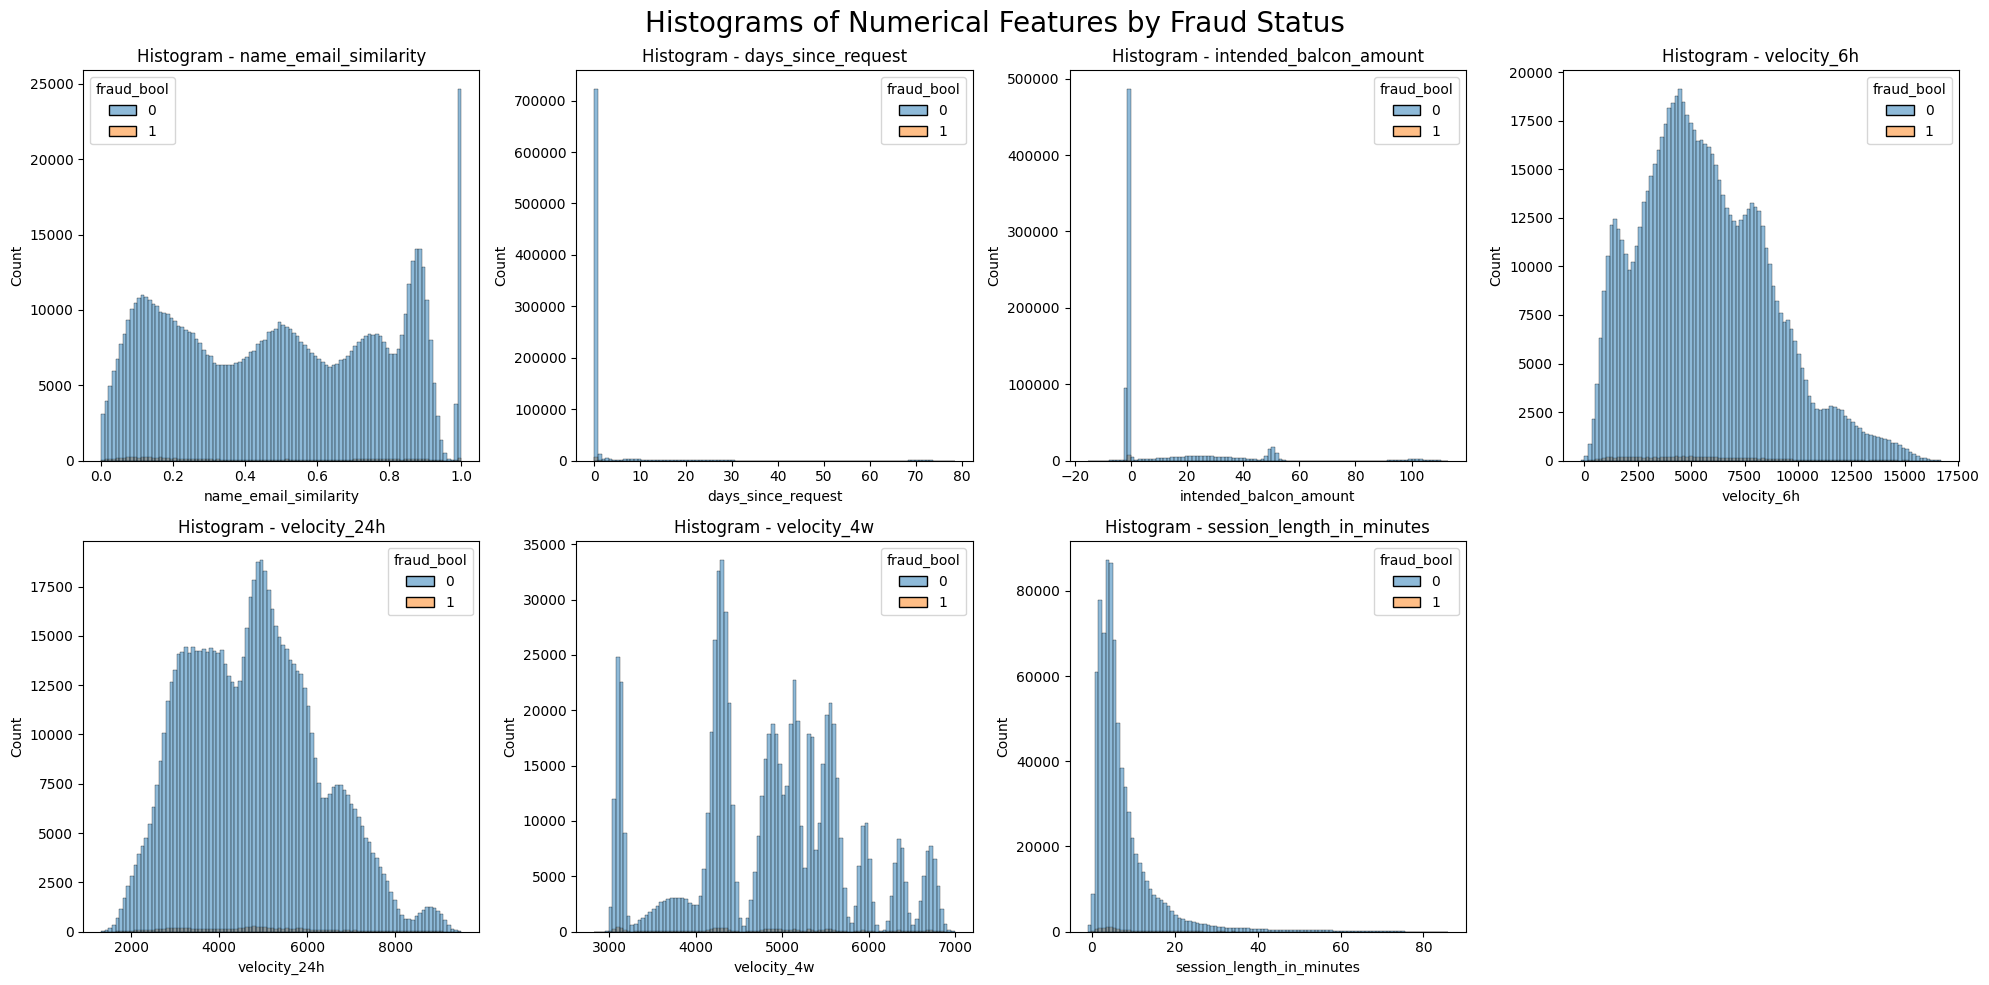

In [13]:
# Extracting numerical features excluding the target (fraud_bool)
X_num = num_df  # All columns except the first are numerical features
y = train_df.iloc[:, 0]  # The target column 'fraud_bool'

# Sample the data to a smaller size for resource-intensive plots
sample_size = min(10000, len(X_num))
X_num_sample = X_num.sample(n=sample_size, random_state=42)
y_sample = y.loc[X_num_sample.index]

# Set the maximum number of plots per row
max_cols = 4

# Histograms for numerical features
num_rows = (len(X_num.columns) + max_cols - 1) // max_cols
fig, axes = plt.subplots(num_rows, max_cols, figsize=(5 * max_cols, 5 * num_rows))
axes = axes.flatten()
for i, feat in enumerate(X_num.columns):
    sns.histplot(data=X_num, x=feat, bins=100, ax=axes[i], hue=y)
    axes[i].set_title(f'Histogram - {feat}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Histograms of Numerical Features by Fraud Status', fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
# Boxplots for numerical features
fig, axes = plt.subplots(num_rows, max_cols, figsize=(5 * max_cols, 5 * num_rows))
axes = axes.flatten()
for i, feat in enumerate(X_num.columns):
    sns.boxplot(x=y, y=X_num[feat], ax=axes[i])
    axes[i].set_title(f'Box Plot - {feat} by Fraud Status')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Boxplots of Numerical Features by Fraud Status with Outliers', fontsize=20)
plt.tight_layout()
plt.show()

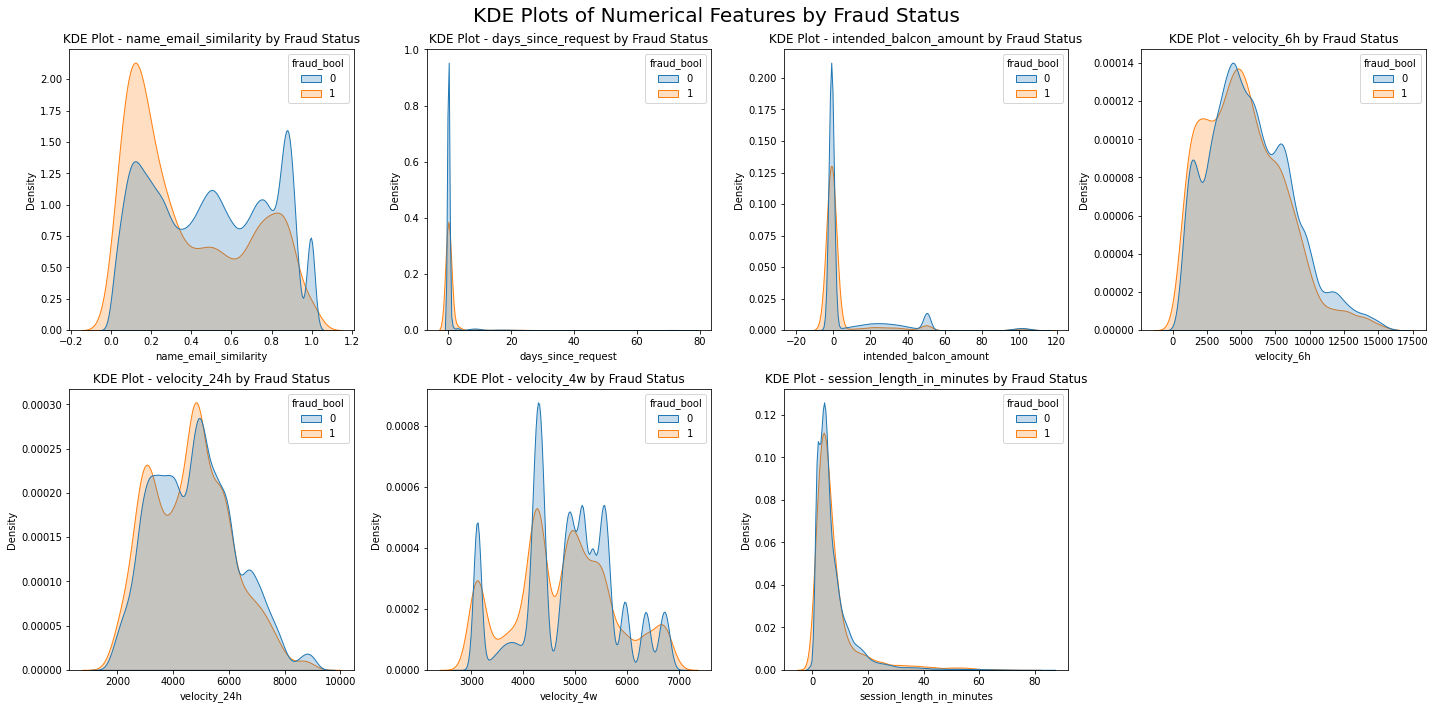

In [ ]:
# KDE Plots for numerical features
fig, axes = plt.subplots(num_rows, max_cols, figsize=(5 * max_cols, 5 * num_rows))
axes = axes.flatten()
for i, feat in enumerate(X_num.columns):
    sns.kdeplot(data=X_num, x=feat, hue=y, fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(f'KDE Plot - {feat} by Fraud Status')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('KDE Plots of Numerical Features by Fraud Status', fontsize=20)
plt.tight_layout()
plt.show()

### Name Email Similarity
- **Strong Fraud Signal**: Shows distinct distribution patterns between fraud/non-fraud
- **Key Observations**:
 - Fraudulent cases concentrated around 0.1-0.3 similarity (single peak)
 - Non-fraud cases show multi-modal distribution with peaks at ~0.2, ~0.5, ~0.8, and ~0.95
 - High similarity (>0.8) strongly indicates legitimate transactions

### Days Since Request 
- **Highly Skewed Distribution**:
 - Vast majority of transactions occur within first few days
 - Long tail extends to 80 days
 - Similar patterns for both fraud/non-fraud cases
 - Most activity concentrated in first 24-48 hours

### Intended Balcon Amount
- **Notable Patterns**:
 - Large spike at small amounts for both classes
 - Fraud cases show slightly higher values in mid-range
 - Many missing values (shown as zeros)
 - Outliers extend to ~120 units

### Velocity Metrics

#### 6-hour Velocity
- **Distribution**:
 - Right-skewed with multiple modes
 - Fraud cases show slightly lower median
 - Substantial overlap between classes
 - Range from ~0 (it goes a little lower) to ~17,500

#### 24-hour Velocity
- **Distribution**:
 - More normalized than 6h
 - Bimodal pattern visible
 - Less class separation than 6h velocity
 - Range typically between 2,000-8,000

#### 4-week Velocity
- **Distinct Pattern**:
 - Multiple clear peaks in distribution
 - Cyclical pattern suggests regular activity cycles
 - Fraud cases show different peak patterns
 - Concentrated between 3,000-7,000
 - Shows most distinct separation between fraud/non-fraud but seems random
 - Could indicate the feature is not useful so should be tested to be removed


### Session Length
- **Key Patterns**:
 - Extremely right-skewed
 - Most sessions under 20 minutes
 - Similar distributions for fraud/non-fraud which means this feature should be removed
 - Outliers extend to 80+ minutes
 - Sharp peak at very short sessions
 - Has no impact on output so should be removed

### Model Development Insights

1. **Strong Predictors**:
  - name_email_similarity (best class separation)
  - velocity_4w (distinct cyclical patterns)
  - velocity_6h (some separation in distributions)

2. **Class Imbalance**:
  - Visible in all distributions
  - Non-fraud class significantly larger
  - Particularly evident in email similarity distribution

3. **Interaction Effects to Consider**:
  - Relationship between different velocity windows
  - Email similarity combined with session length
  - Balcon amount patterns with velocity metrics
  - Time-based patterns in request delays

4. **Data Quality Notes**:
  - Significant number of missing balcon amounts
  - Possible outliers in all velocity metrics
  - Session length shows extreme values
  - Some negative values in velocity metrics need to be capped

## 3.3 Null hypothesis testing

The null hypothesis testing is performed to test if possible transformations will be useful for the numerical features. We test the means of the transformed numerical features are significantly different between fraudulent and non-fraudulent transactions. We use the z-test to compare the means of the two groups and calculate the p-value. If the p-value is less than 0.05, we reject the null hypothesis and conclude that the means are significantly different.

In [ ]:
# Calculate null hypothesis
null_counts = train_df['fraud_bool'].value_counts()
null_total = null_counts.sum()
null_fraud = null_counts.get(1, 0)
null_p = null_fraud / null_total

# Calculate the upper bound for outliers in 'days_since_request'
upper_bound = train_df['days_since_request'].quantile(0.75) + 1.5 * (train_df['days_since_request'].quantile(0.75)-train_df['days_since_request'].quantile(0.25))

# List of conditions with their descriptions
conditions = [
    ('Small outliers in days_since_request', (train_df['days_since_request'] > upper_bound) & (train_df['days_since_request'] < 50)),
    ('Large outliers in days_since_request', train_df['days_since_request'] > 50),
    ('Small times in days_since_request', train_df['days_since_request'] < train_df['days_since_request'].quantile(0.25)),
    ('Positive accounts in intended_balcon_amount', train_df['intended_balcon_amount'] > 0),
    ('Negative session times', train_df['session_length_in_minutes'] < 0),
    ('Negative velocity values', train_df['velocity_6h'] < 0)
]

# Initialize dataframe list
results = [{
    'Part of dataframe': 'Null hypothesis',
    'Probability of fraud': null_p,
    'Number of observations': null_total,
    'P-value': 1
}]

# Loop over conditions to compute probabilities and p-values
for description, condition in conditions:
    subset = train_df[condition]
    subset_counts = subset['fraud_bool'].value_counts()
    subset_total = subset_counts.sum()
    subset_fraud = subset_counts.get(1, 0)
    
    if subset_fraud > 0:
        subset_p = subset_fraud / subset_total
        p_value = sm.stats.proportions_ztest([null_fraud, subset_fraud], [null_total, subset_total])[1]
    else:  
        subset_p = 0
        p_value = None
    
    results.append({
        'Part of dataframe': description,
        'Probability of fraud': subset_p,
        'Number of observations': subset_total,
        'P-value': p_value
    })

# Create and print hypothesis dataframe
hypothesis_df = pd.DataFrame(results)
hypothesis_df.style.format({'P-value': '{:.2e}'}).hide(axis='index')

Part of dataframe,Probability of fraud,Number of observations,P-value
Null hypothesis,0.011029,800000,1.00e+00
Small outliers in days_since_request,0.013329,72921,1.64e-08
Large outliers in days_since_request,0.013145,2967,2.71e-01
Small times in days_since_request,0.013150,200000,1.53e-15
Positive accounts in intended_balcon_amount,0.004958,206132,1.35e-137
Negative session times,0.009858,1623,6.52e-01
Negative velocity values,0.000000,36,nan
Velocity 6h/24h,0.000000,0,nan


- Null hypothesis: Probability of fraud is 0.011029 based on 800,000 observations, with no significant deviation (p-value = 1.00).
- Small outliers in `days_since_request`: Higher fraud probability (0.013329) and statistically significant (p-value = 1.64e-08) suggests a potential impact.
- Large outliers in `days_since_request`: Higher fraud probability (0.013145), but not statistically significant (p-value = 0.271).
- Small times in `days_since_request`: Higher fraud probability (0.013150) with high statistical significance (p-value = 1.53e-15).
- Positive accounts in `intended_balcon_amount`: Lower fraud probability (0.004958) with strong statistical significance (p-value = 1.35e-137).
- Negative session times: Lower fraud probability (0.009858), not statistically significant (p-value = 0.652).
- Negative velocity values: Zero fraud probability (0.000000), but based on very few observations (n=36), which limits reliability.

We should consider using small outliers and small times as potential features due to their p-values. We should definitely use positive accounts as a key feature due to its strong statistical significance. We should consider excluding or deprioritizing `days_since_request` and `session_length` due to their low p-values. We should also consider excluding negative velocity values due to its low sample size.

## 3.4 Correlation between numerical features

### 3.4.1 Correlation matrix

The correlation matrix shows the pairwise correlation coefficients between numerical features.

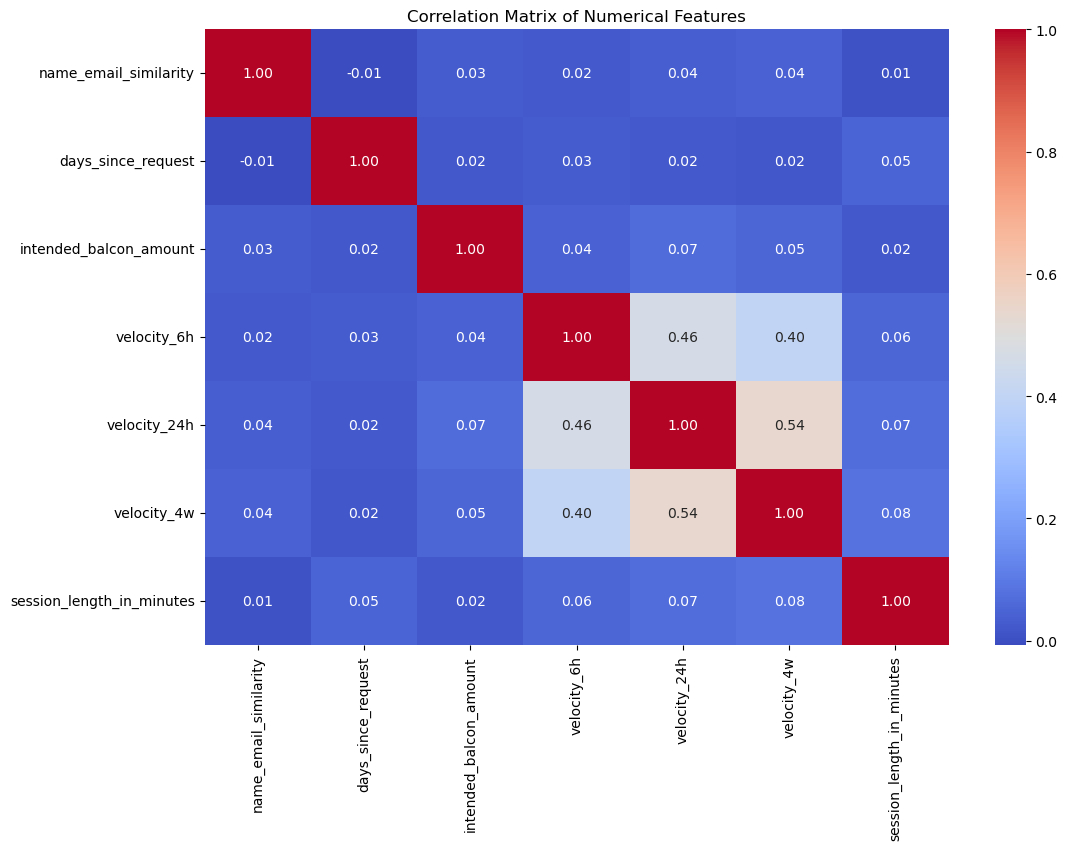

In [ ]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

- The velocity features (`velocity_6h`, `velocity_24h`, `velocity_4w`) have moderate correlations with each other (ranging from 0.40 to 0.54), indicating shared information.
- Other features (`name_email_similarity`, `days_since_request`, `intended_balcon_amount`, `session_length_in_minutes`) have very weak correlations with each other, suggesting independence.
- No features exhibit high correlations (e.g., > 0.8). 
- Velocity features might be good candidates for dimensionality reduction or combining into composite features due to their shared information.

### 3.5 Feature transformations and preprocessing for numerical features

1. **Name Email Similarity**
   - Create 4 bins with size 0.24 and 1 bin with size 0.04 between 0-1
   - Use ordinal encoding

2. **Days Since Request**
   - Log-transform and remove outliers after standard scaling

3. **Intended Balcon Amount** (74.23% missing)
   - Impute missing values (-1) to 0 
   - Create `MISSING_FLAG_intended_balcon_amount` to indicate missing values.
   - Log-transform and remove outliers after standard scaling

4. **Velocity Metrics**
   - **Velocity 6h**: Impute negative values with 0. Standard scaling
   - **Velocity 24h**: Standard scaling
   - **Velocity 4w**: Remove feature

5. **Session Length in Minutes**
   - Remove feature



# 4. Categorical Features

## 4.1 Cardinality of Categorical Features

We want to understand the cardinality of the categorical features to determine how many unique values each feature has. High-cardinality features will require different treatment compared to low-cardinality features.

In [ ]:
cat_df.nunique()

fraud_bool                             2
prev_address_months_count            374
current_address_months_count         421
customer_age                           9
payment_type                           5
zip_count_4w                        6268
bank_branch_count_8w                2318
date_of_birth_distinct_emails_4w      40
employment_status                      7
credit_risk_score                    550
email_is_free                          2
housing_status                         7
phone_home_valid                       2
phone_mobile_valid                     2
bank_months_count                     33
has_other_cards                        2
foreign_request                        2
source                                 2
device_os                              5
keep_alive_session                     2
device_distinct_emails_8w              4
device_fraud_count                     1
month                                  8
income                                 9
proposed_credit_

Some categories have a high number of unique values, which make them far more continuous than the low-cardinality categories. To separate the two types of categories so that more accurate analyses can be performed on them, we will use a threshold of 12 unique values to define high-cardinality categories and separate the two into different dataframes.

In [ ]:
# Create the high and low cardinality categorical dataframes
highcard_df = cat_df[[col for col in cat_df.columns if cat_df[col].nunique() > 12]]
lowcard_df = cat_df[[col for col in cat_df.columns if (cat_df[col].nunique() <= 12) & (cat_df[col].nunique() > 2)]]
bool_df = cat_df[[col for col in cat_df.columns if cat_df[col].nunique() <= 2]]

## 4.12 High-Cardinality Categorical Features

### 4.121 Summary statistics of numerical features
To understand the distribution and behavior of our high-cardinality categorical features, we examine the summary statistics of each attribute. The table below the function summarizes the key statistics.

In [ ]:
def disc_summary(feat):
    columns = ['dtype', 'count', 'unique', 'top_value_counts', 'missing_count',
               'missing_percentage', 'mode', 'mode_frequency', 'outlier_count', 'cv', 'corr_with_target']
    
    summary = pd.DataFrame(index=[feat], columns=columns)
    col = train_df[feat].copy()
    
    # Summary statistics
    summary.loc[feat, 'count'] = col.count()
    summary.loc[feat, 'unique'] = col.nunique()
    
    # Missing values count and percentage
    summary.loc[feat, 'missing_count'] = col.isnull().sum()
    summary.loc[feat, 'missing_percentage'] = col.isnull().sum() / len(col) * 100
    
    # Top value counts (3 most common values)
    value_counts = col.value_counts().head(3)
    summary.loc[feat, 'top_value_counts'] = str(value_counts.to_dict())
    
    # Mode and its frequency
    mode_value = col.mode()[0] if not col.mode().empty else np.nan
    summary.loc[feat, 'mode'] = mode_value
    summary.loc[feat, 'mode_frequency'] = value_counts.get(mode_value, 0)
    
    # Outlier count using IQR method (if the feature is numeric and can be analyzed for outliers)
    if pd.api.types.is_numeric_dtype(col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_count = ((col < lower_bound) | (col > upper_bound)).sum()
        summary.loc[feat, 'outlier_count'] = outlier_count
        
        # Coefficient of Variation
        summary.loc[feat, 'cv'] = np.nan if col.mean() == 0 else col.std() / col.mean()
    else:
        summary.loc[feat, 'outlier_count'] = 0
        summary.loc[feat, 'cv'] = np.nan
    
    # Correlation with target variable (if numeric)
    if pd.api.types.is_numeric_dtype(col) and pd.api.types.is_numeric_dtype(train_df['fraud_bool']):
        summary.loc[feat, 'corr_with_target'] = col.corr(train_df['fraud_bool'])
    else:
        summary.loc[feat, 'corr_with_target'] = np.nan
    
    # Data type
    summary.loc[feat, 'dtype'] = str(col.dtypes)
    
    # Ensure appropriate data types for integer columns
    int_cols = ['count', 'unique', 'missing_count', 'mode_frequency', 'outlier_count']
    summary[int_cols] = summary[int_cols].astype(int)
    
    return summary

# Applying the function to each feature and combining the results
summary_df = pd.concat([disc_summary(feat) for feat in highcard_df.columns])

# Display summary
display(summary_df)


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mode,mode_frequency,outlier_count,cv,corr_with_target
prev_address_months_count,float64,229475,373,"{11.0: 9204, 28.0: 8246, 29.0: 8079}",570525,71.32,11.00,9204,21552,1.05,0.02
current_address_months_count,float64,796609,420,"{6.0: 13001, 7.0: 12952, 8.0: 12874}",3391,0.42,6.00,13001,33154,1.02,0.03
zip_count_4w,int64,800000,6268,"{1062: 645, 1020: 644, 941: 622}",0,0.00,1062,645,47882,0.64,0.01
bank_branch_count_8w,int64,800000,2318,"{1: 119074, 0: 115535, 2: 46310}",0,0.00,1,119074,140220,2.49,-0.01
date_of_birth_distinct_emails_4w,int64,800000,40,"{7: 66534, 5: 64588, 8: 63581}",0,0.00,7,66534,7829,0.53,-0.04
credit_risk_score,int64,800000,550,"{116: 5436, 115: 5417, 110: 5402}",0,0.00,116,5436,6986,0.53,0.07
bank_months_count,float64,597396,32,"{1.0: 155878, 28.0: 64172, 15.0: 47326}",202604,25.33,1.00,155878,0,0.78,0.02


- `prev_address_months_count`: Has a high missing percentage (71.32%), a mean of (11.00), and a low correlation with the target (0.02). It may need imputation or exclusion because of its high missing percentage. The outlier count (21,552) also suggests that outlier treatment could be necessary. Its predictive power appears low, so it may be deprioritized.
- `current_address_months_count`: Has a moderate missing percentage (0.42%) and a slight positive correlation with the target (0.02). With a manageable missing rate, it could be retained, but because it has a low correlation, it'll probably be deprioritized. Additionally, handling outliers may be necessary.
- `zip_count_4w`: Has no missing values, with a low correlation with the target (0.01). The outlier count (47,882) may require some outlier treatment, but the overall contribution might be minimal, so it may be deprioritized.
- `bank_branch_count_8w`: Has no missing values and a very slight negative correlation (-0.01). Its high outlier count (140,220) indicates it could benefit from normalization or transformation, but even so, the it may be deprioritized due to its low correlation.
- `date_of_birth_distinct_emails_4w`: No missing values, with a slightly negative correlation (-0.04). Given that this is one of the highest correlations among the high-cardinality features, it should be retained. The high outlier count (140,220) suggests that normalization or transformation may be necessary.
- `credit_risk_score`: Has no missing values and is moderately correlated with the target (0.07). The correlation is still relatively low, but it's one of the highest among the high-cardinality features, so it should be retained.
- `bank_months_count`: Has a high missing percentage (25.33%) and a slight positive correlation (0.02). Imputation may be required for this feature, but because it has a low correlation, it may be deprioritized.

Features like `credit_risk_score` and `date_of_birth_distinct_emails_4w` are the most useful of these for predictive modeling because they have the highest absolute cardinalities compared to the other high cardinality features. Features with high missing data, such as `prev_address_months_count`, will most likely require imputation before they're usable, while those with near-zero correlation, like `zip_count_4w`, could be deprioritized or removed.

## 4.22 Visualization of High-Cardinality Categorical Features

We visualize the high-cardinality categorical features to gain insights into their distributions and relationships with the target variable. 

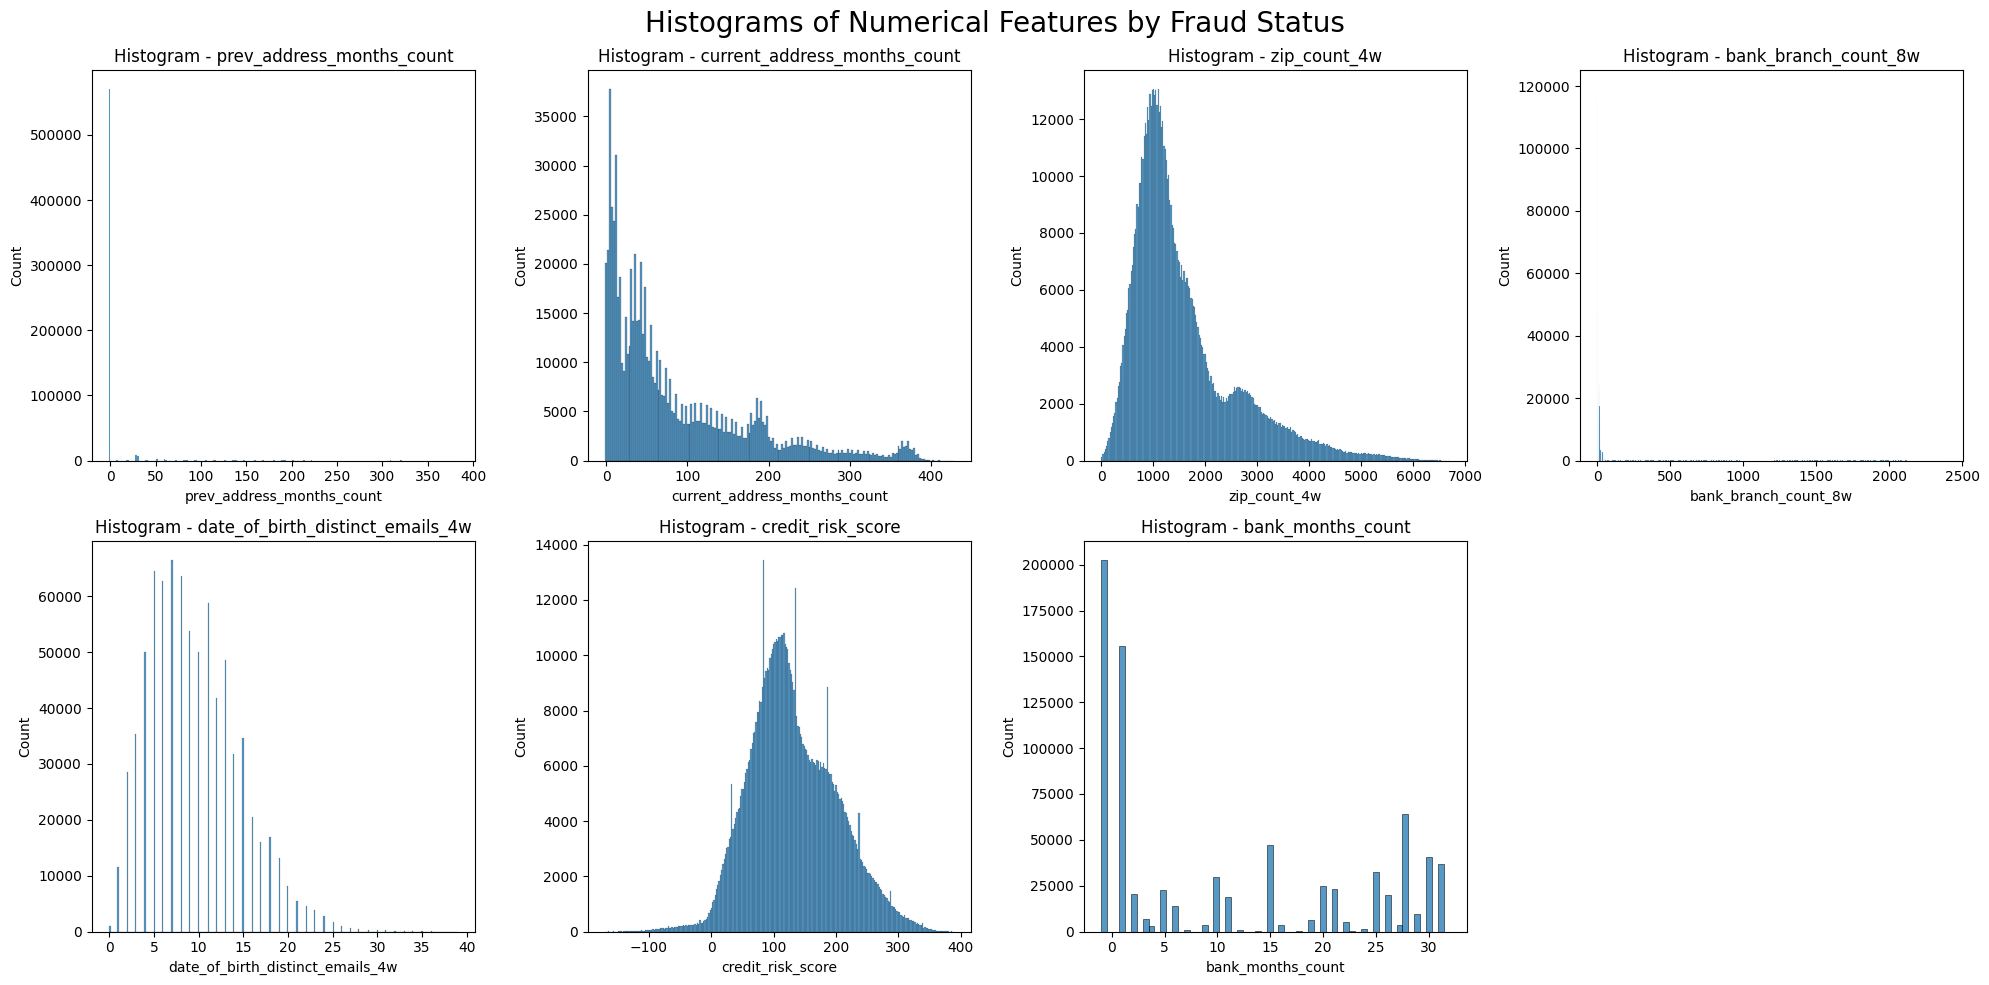

In [ ]:
# Extracting numerical features excluding the target (fraud_bool)
X_num = highcard_df
y = train_df.iloc[:, 0]  # The target column 'fraud_bool'

# Sample the data to a smaller size for resource-intensive plots
sample_size = min(10000, len(X_num))
X_num_sample = X_num.sample(n=sample_size, random_state=42)
y_sample = y.loc[X_num_sample.index]

# Set the maximum number of plots per row
max_cols = 4

# Histograms
num_rows = (len(X_num.columns) + max_cols - 1) // max_cols
fig, axes = plt.subplots(num_rows, max_cols, figsize=(5 * max_cols, 5 * num_rows))
axes = axes.flatten()
for i, feat in enumerate(X_num.columns):
    sns.histplot(data=X_num, x=feat, bins='auto', ax=axes[i])
    axes[i].set_title(f'Histogram - {feat}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Histograms of Numerical Features by Fraud Status', fontsize=20)
plt.tight_layout()
plt.show()


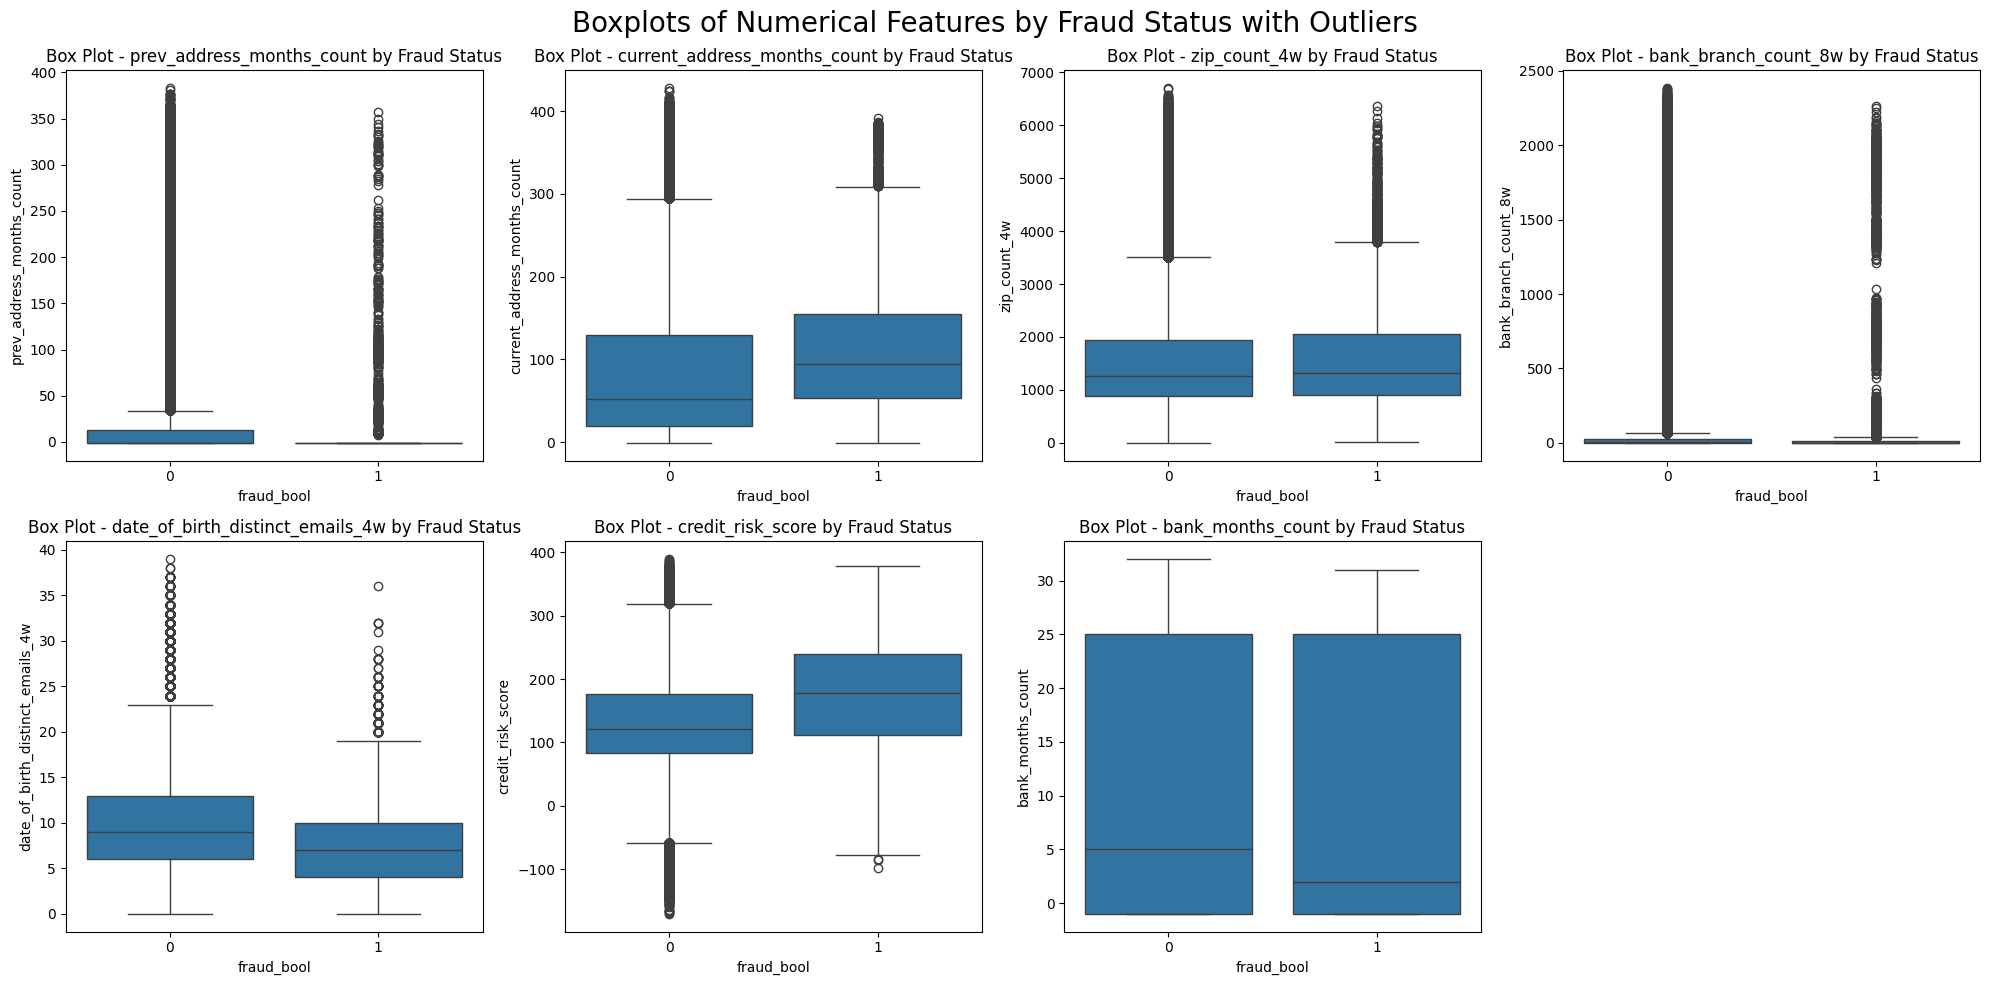

In [ ]:
# Boxplots
fig, axes = plt.subplots(num_rows, max_cols, figsize=(5 * max_cols, 5 * num_rows))
axes = axes.flatten()
for i, feat in enumerate(X_num.columns):
    sns.boxplot(x=y, y=X_num[feat], ax=axes[i])
    axes[i].set_title(f'Box Plot - {feat} by Fraud Status')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Boxplots of Numerical Features by Fraud Status with Outliers', fontsize=20)
plt.tight_layout()
plt.show()

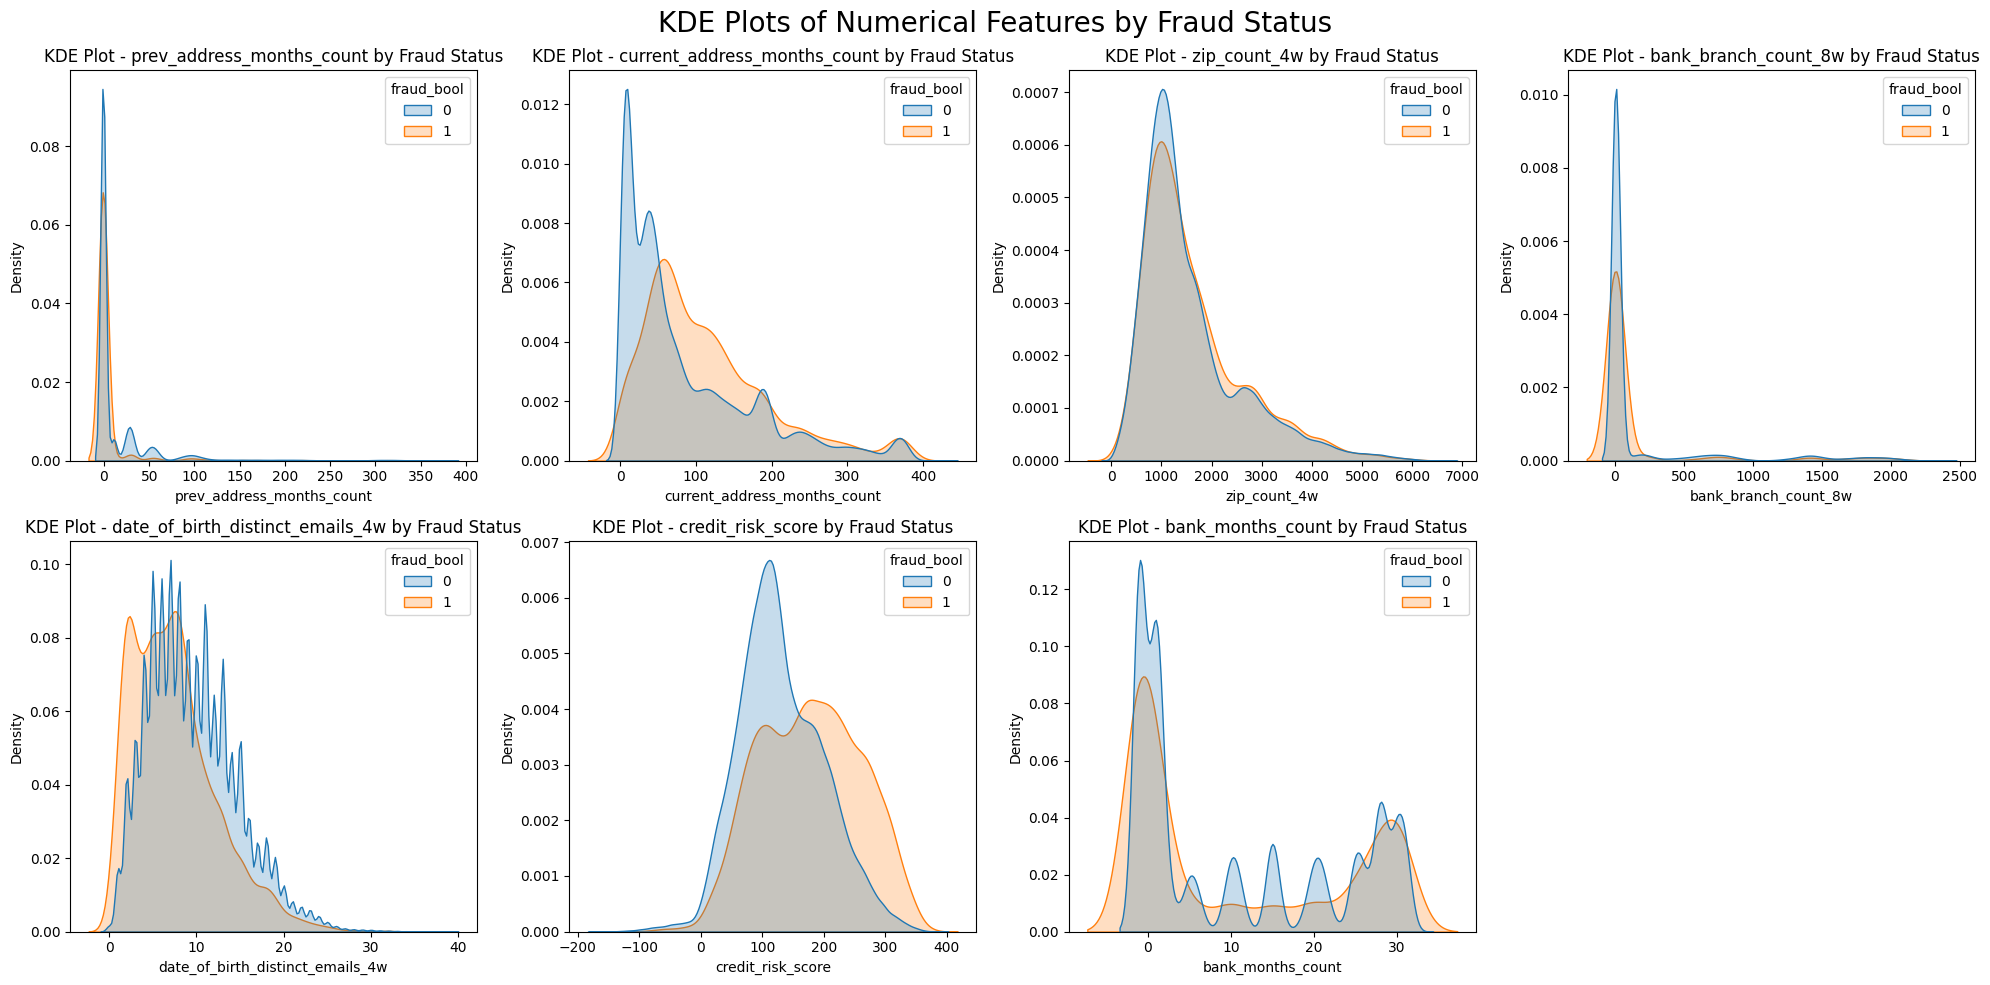

In [ ]:
# KDE Plots
fig, axes = plt.subplots(num_rows, max_cols, figsize=(5 * max_cols, 5 * num_rows))
axes = axes.flatten()
for i, feat in enumerate(X_num.columns):
    sns.kdeplot(data=X_num, x=feat, hue=y, fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(f'KDE Plot - {feat} by Fraud Status')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('KDE Plots of Numerical Features by Fraud Status', fontsize=20)
plt.tight_layout()
plt.show()

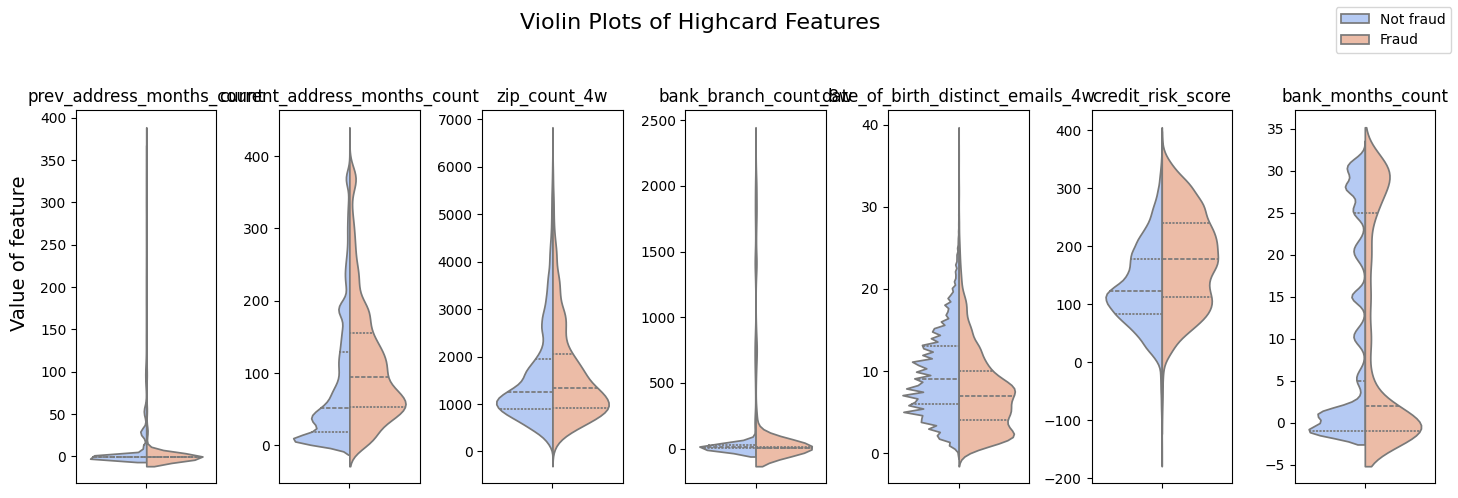

In [ ]:
# Create violin plots
new_df = highcard_df.copy()
new_df['fraud_bool'] = train_df['fraud_bool'].map({0: 'Not fraud', 1: 'Fraud'})
new_df[''] = ''  

# Create subplots 
fig, axes = plt.subplots(1, len(highcard_df.columns), figsize=(15, 5))
axes = axes.flatten()
for i, feature in enumerate(highcard_df.columns):
    sns.violinplot(
        x='', y=feature, data=new_df, hue='fraud_bool',
        split=True, palette='coolwarm', scale='width',
        inner='quartile', ax=axes[i]  
    )
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel('')  # No x-label needed
    axes[i].set_ylabel('')  # No y-label on individual plots

    if axes[i].legend_:
        axes[i].legend_.remove()

# Formatting
fig.suptitle('Violin Plots of Highcard Features', fontsize=16)
fig.text(0.04, 0.5, 'Value of feature', va='center', rotation='vertical', fontsize=14)
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout(rect=[0.05, 0, 1, 0.93])
plt.show()



For the prev_address_months_count we can see that there are many values of -1 with the minimum and Q1 also being -1. This could be an important feature and will be tested to see if it is beneficial for our model. The rest of the features look pretty randomly distributed so it is most likely sufficient to just convert this into a boolean variable to check if it equals -1. 

For current_address_months_count we can do the same where we test the features which are -1 but now we have information in the tail of the distribution. It looks right skewed which we can fix using a log-transform. There is also a little bump around 380 which could affect the scaling process but we decide to keep it for now. Ordinal encoding will be the best way to handle the data since we have so many categories. 

The zip_count_data is probably the cleanest data we have seen so far and with a log-transform to make it normal and removing outliers it will be ready to be used in the model directly. There are so many categories we should use ordinal encoding because two zip codes nearby are closer to eachother and one-hot encoding would lose this information. 

Bank_branch_count_8w has many 0 values which will need to be analysed if we want to add it as a boolean feature. If an applicant has made very many applications it would probably be a fraud but the exact value isn't as important. One way to encode this is by using binning such as 0, 0-5, 5-20, 20-50, 50-100, 100+.

For the feature number of emails with the same date of birth the last 4 weeks I think that only abnormally large values are interesting and the rest would just be normally distributed. The classifier could to do this distinction by itself so I think we should simply keep all of the data and scale it down. We have a few data points with many samples but this could be just pure coincidence.

The credit_risk_score feature can be seen to have negative values but this shouldn't be an issue since we can translate the feature when scaling. It also looks close to normal but with outliers that can be removed and many categories which means we are going to use ordinal encoding. 

The bank_months_count feature looks a bit strange with a wide range of values from -1 to 32, and a lot of clustering toward the lower end. We see a concentration of data points with a small count of months, which may represent users with new accounts. The -1 values could indicate missing data, so it’s important to test whether they are beneficial for the model by converting them into a boolean feature or imputing them with a reasonable value. The data is right-skewed, so applying a log-transform would likely help make the distribution more normal. Additionally, the distribution suggests that ordinal encoding will be the best way to handle the data.

## 4.2.3 Correlation between numerical features

### 4.2.3.1 Correlation matrix

The correlation matrix shows the pairwise correlation coefficients between numerical features.

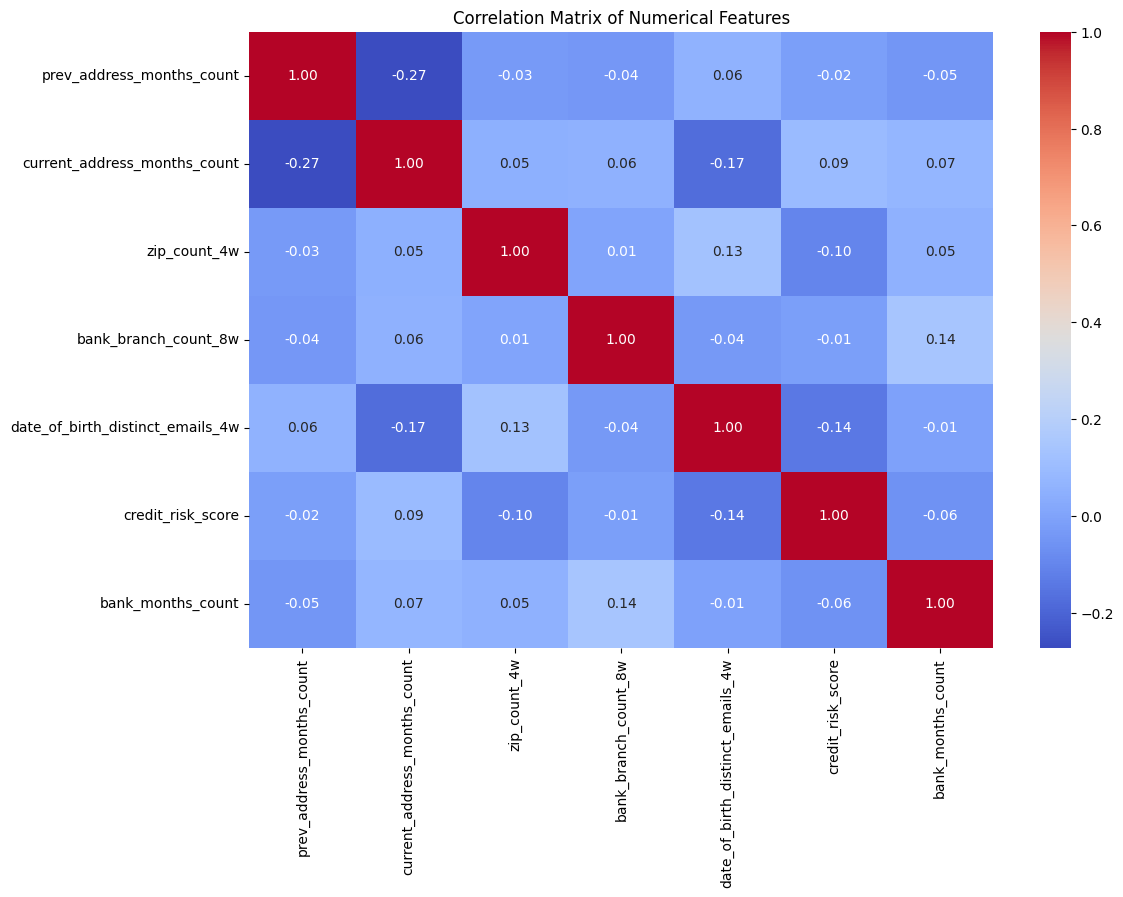

In [ ]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(highcard_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of High Cardinality Features")
plt.show()

The high cardinality features exhibit weak correlations with each other, suggesting that they are independent from each other.

- The `current_address_months_count` and `prev_address_months_count` show a moderate negative correlation (-0.27), which could indicate some degree of overlap in terms of residency history.
- The `credit_risk_score` has weak correlations with most other features, indicating that it may provide unique information for model inputs.
- `zip_count_4w`, `bank_branch_count_8w`, and `bank_months_count` has weak correlations with other features, suggesting they may provide unique information for model inputs.

None of the features display high correlations (e.g., > 0.8), meaning each feature potentially offers distinct insights. The moderate overlap between address-related features could be considered for potential feature engineering or transformation.

### 4.2.3.2 Correlation with the target variable

The correlation between the numerical features and the target variable is calculated using the point-biserial correlation coefficient. The point-biserial correlation coefficient is a measure of the strength and direction of the association between a binary variable and a continuous variable. It ranges from -1 to 1, where 1 indicates a perfect positive relationship, -1 indicates a perfect negative relationship, and 0 indicates no relationship. It's a good measure of how good a feature is at predicting the target variable.

C:\Users\Michael\AppData\Local\Temp\ipykernel_24704\2220593891.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


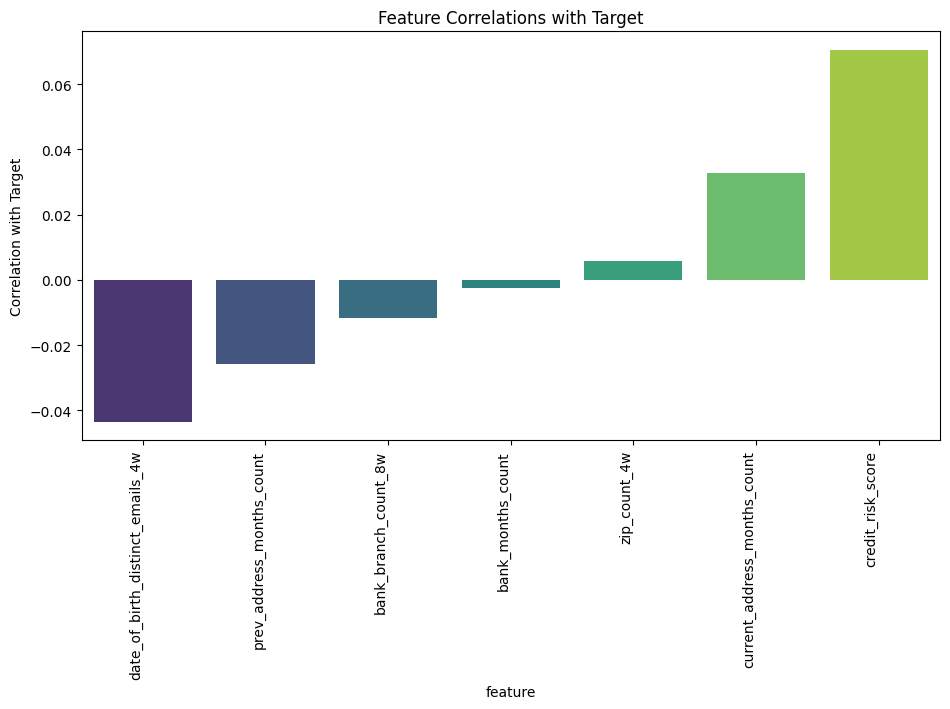

In [ ]:
fig = plt.figure(figsize=(9.6, 7.2))
corr_target = pd.DataFrame(highcard_df.corrwith(train_df.iloc[:, 0])).reset_index()
corr_target.columns = ['feature', 'target_correlation']
corr_target = corr_target.sort_values(by='target_correlation')
ax = sns.barplot(data=corr_target, x='feature', y='target_correlation', palette='viridis')
ax.set_title('Feature Correlations with Target')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_ylabel('Correlation with Target')
fig.tight_layout()
plt.show()

- `date_of_birth_distinct_emails_4w` has a negative correlation, indicating a small inverse relationship with the target. However, the correlation is weak, suggesting limited predictive power.
- `prev_address_months_count` and `bank_branch_count_8w` also have slight negative correlations. The correlations are weaker than `date_of_birth_distinct_emails_4w`, indicating more limited predictive power.
- `1credit_risk_score` exhibits the highest positive correlation with the target, indicating that as the credit risk score increases, the target value also increases. However, the correlation is still weak, suggesting limited predictive power.
- `current_address_months_count` and `zip_count_4w` have weak positive correlations. The correlations are weaker than `credit_risk_score`, indicating more limited predictive power.

Overall, the small correlation values indicate that none of the features have a dominant influence on the target in isolation, indicating that these features may be better predictors when used in combination or that they should be deprioritized in the modeling process.

## 4.2.4 Feature transformations and preprocessing for high-cardinality categorical features

### 4.2.4.1 Handling Missing Values
1. **Previous Address Months Count**
   - High missing rate (71.32%) with mean value 11.00 and low correlation with target (0.02).
   - Recommendations:
     - Impute missing values with `-1`.
     - Create a flag (`MISSING_FLAG_prev_address_months_count`) to indicate imputed values.
     - May be deprioritized due to low correlation.

2. **Current Address Months Count**
   - Moderate missing rate (0.42%) and slight positive correlation with the target (0.02).
   - Recommendations:
     - Impute missing values with `-1`.
     - Create a flag (`MISSING_FLAG_current_address_months_count`) to indicate imputed values.
     - May be deprioritized due to low correlation.

3. **Bank Months Count**
   - High missing rate (25.33%) and slight positive correlation (0.02) with the target.
   - Recommendations:
     - Impute missing values with `-1`.
     - Create a flag (`MISSING_FLAG_bank_months_count`) to indicate imputed values.
     - Low correlation and high missingness suggest it may not be prioritized in modeling.

### 4.2.4.2 Outlier Detection and Distribution Management
1. **Previous Address Months Count**
   - Outlier count of 21,552 may impact analysis, though correlation with the target is low.
   - Recommendations:
     - Outlier treatment may be required if this feature is retained.

2. **Current Address Months Count**
   - Outlier count of 33,154 suggests possible impact on distribution.
   - Recommendations:
     - Handle outliers if retained for modeling.

3. **Zip Count 4W**
   - No missing values, low correlation (0.01), with a high outlier count of 47,882.
   - Recommendations:
     - Outlier treatment might be necessary; however, the feature may be deprioritized due to low correlation.

4. **Bank Branch Count 8W**
   - No missing values, slight negative correlation (-0.01), and a high outlier count (140,220).
   - Recommendations:
     - May require normalization or transformation if retained, but deprioritization may be considered due to low correlation.

5. **Date of Birth Distinct Emails 4W**
   - No missing values, slightly negative correlation (-0.04), and moderate outlier count (7,829).
   - Recommendations:
     - Retain for modeling due to the relatively higher absolute correlation among features.

6. **Credit Risk Score**
   - No missing values, moderate positive correlation with target (0.07), and an outlier count of 6,986.
   - Recommendations:
     - Retain for modeling due to higher correlation compared to other features.

### 4.2.4.3 Preprocessing Pipeline Summary
1. **Missing Values**
   - Impute missing values with `-1`, and create missing flags for features with high missingness rates.

2. **Outlier Management**
   - **Outliers**: Apply outlier treatment for features with high outlier counts, especially those with relatively higher correlations (e.g., `credit_risk_score` and `date_of_birth_distinct_emails_4w`).

3. **Feature Selection**
   - Consider deprioritizing features with low correlation and high missingness or outliers, such as `zip_count_4w` and `prev_address_months_count`.
   - Retain `credit_risk_score` and `date_of_birth_distinct_emails_4w` due to their relatively higher correlations with the target.


## 3.2 Low-cardinality categorical features 

For the low-cardinality categorical features we will plot their distributions along with their relations to the output and then complete the analysis by looking at their plots.

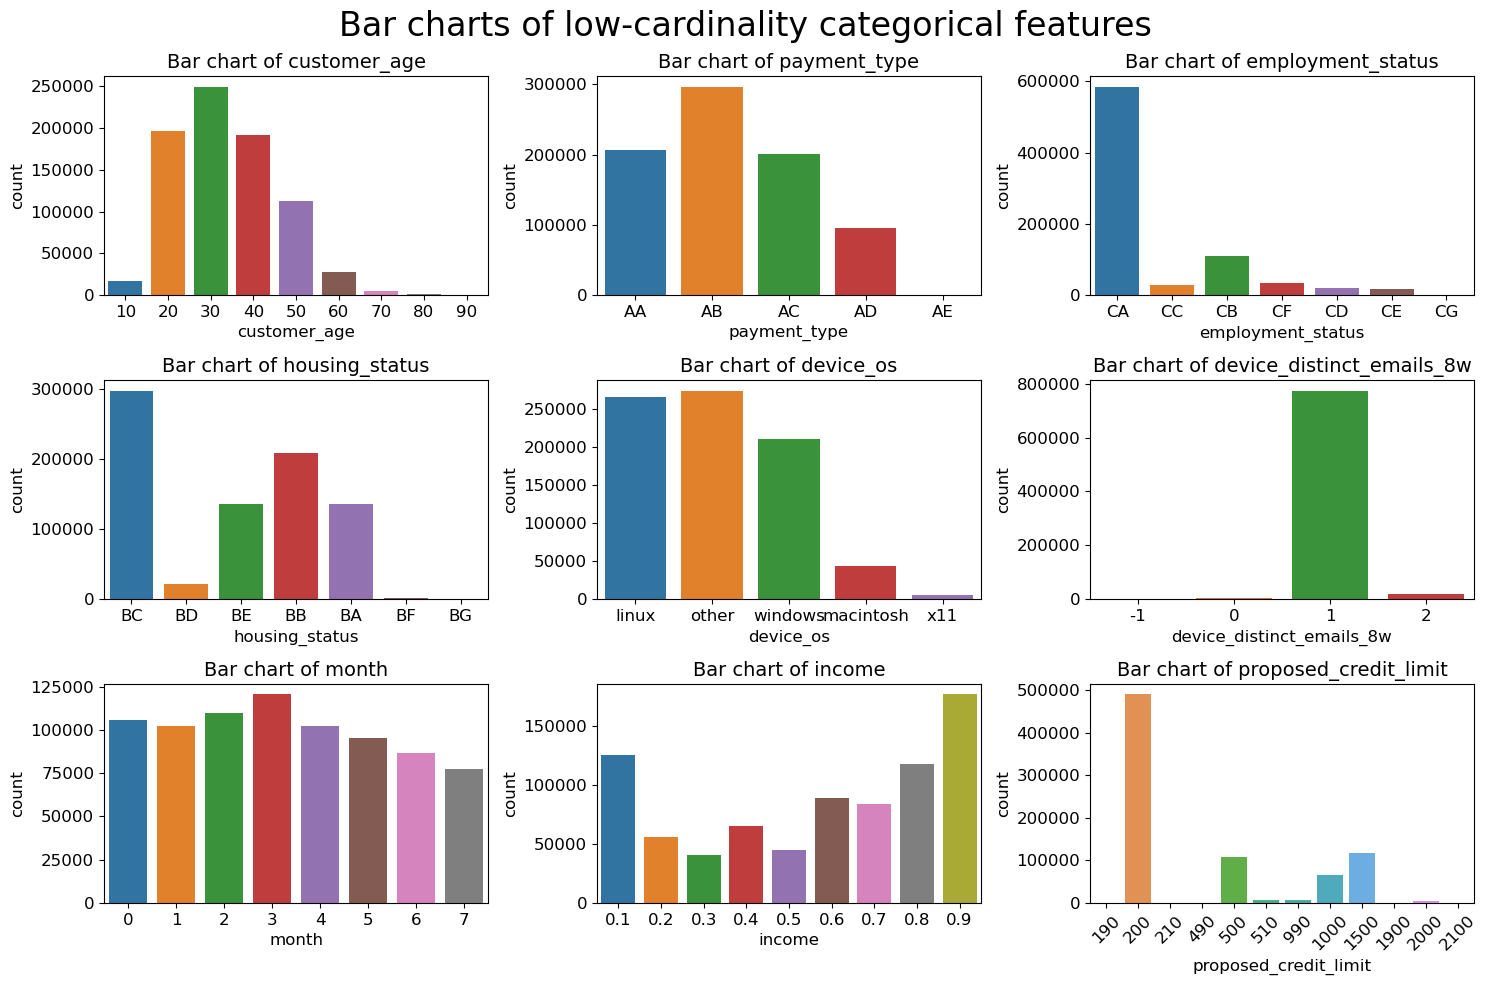

In [ ]:
# Create bar charts for low-cardinality categorical features
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  
axes = axes.flatten()

for i in range(len(lowcard_df.columns)):
    sns.countplot(x=lowcard_df.iloc[:, i], ax=axes[i])
    axes[i].set_title(f"Bar chart of {lowcard_df.columns[i]}", fontsize=14)  
    if (i == 8):
         axes[i].tick_params(axis='x', labelsize=12, rotation=45)  
    else:
        axes[i].tick_params(axis='x', labelsize=12)  
    axes[i].tick_params(axis='y', labelsize=12)  

    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=12)  
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=12)  

fig.suptitle('Bar charts of low-cardinality categorical features', fontsize=24)
plt.subplots_adjust(top=0.9, hspace=0.3)
plt.tight_layout()
plt.show()




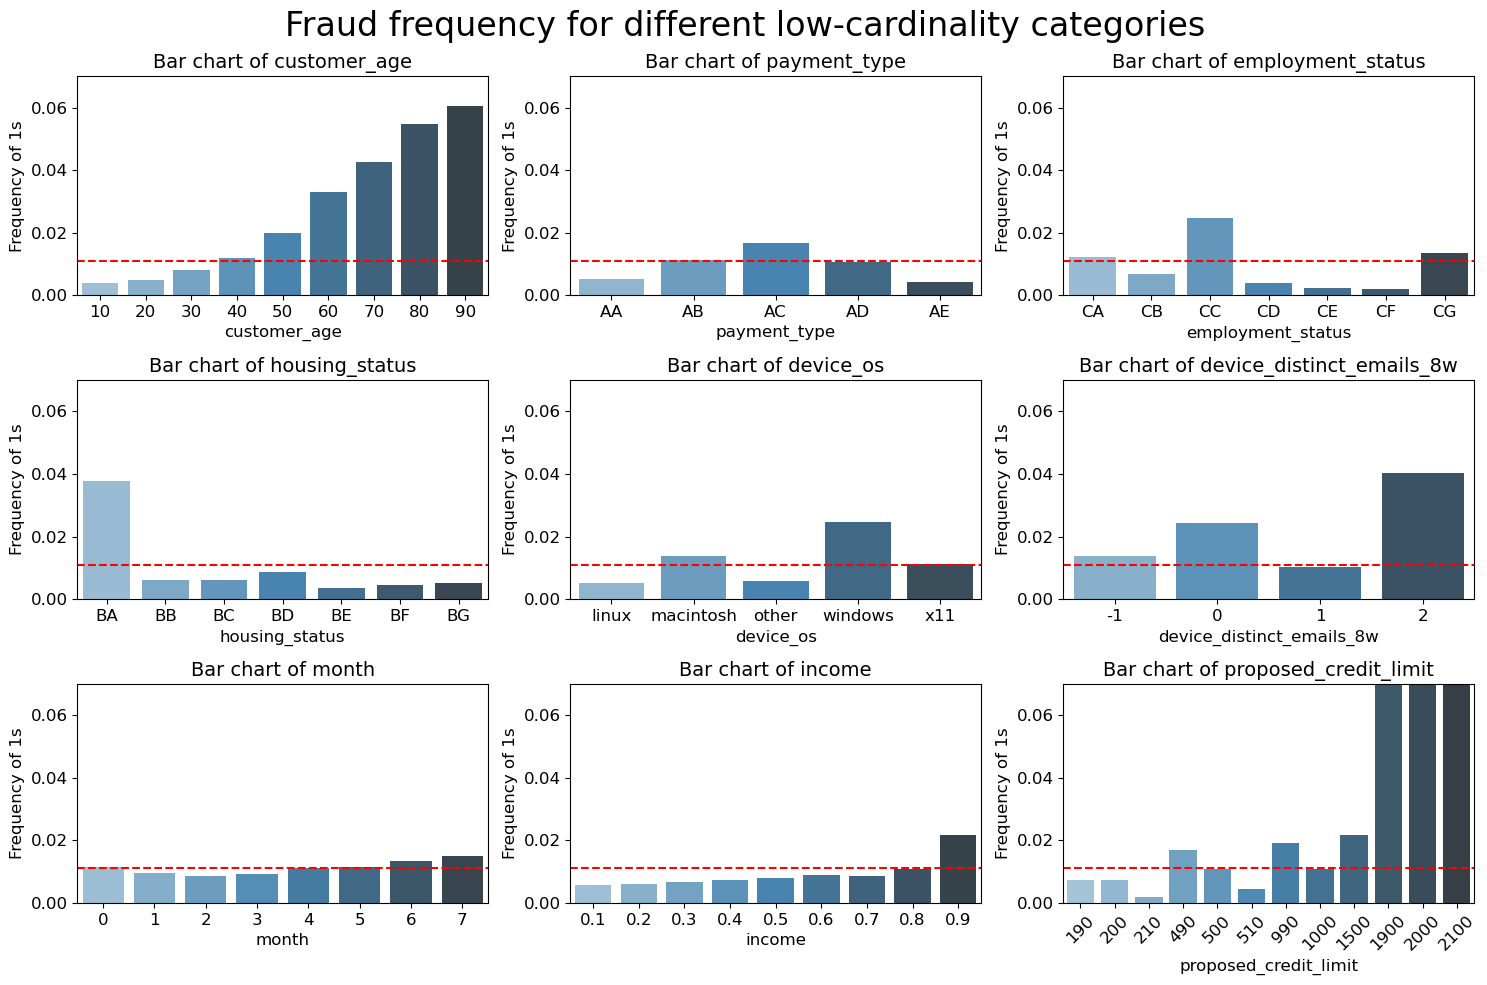

In [ ]:
# Plot frequency distributions for low-cardinality categorical features 
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

y_limit = (0, 0.07)  

for i in range(len(lowcard_df.columns)):
    feature = lowcard_df.columns[i]
    frequency_of_1s = train_df.groupby(lowcard_df[feature])['fraud_bool'].mean().reset_index()
    sns.barplot(x=feature, y='fraud_bool', data=frequency_of_1s, ax=axes[i], palette='Blues_d')
    axes[i].set_title(f"Bar chart of {feature}", fontsize=14)
    axes[i].set_ylim(y_limit)
    axes[i].axhline(y=0.011, color='red', linestyle='--', linewidth=1.5)
    if i == 8:
        axes[i].tick_params(axis='x', labelsize=12, rotation=45)
    else:
        axes[i].tick_params(axis='x', labelsize=12)
    
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=12)
    axes[i].set_ylabel('Frequency of 1s', fontsize=12)


fig.suptitle('Fraud frequency for different low-cardinality categories', fontsize=24)

plt.subplots_adjust(top=0.9, hspace=0.3)
plt.tight_layout()
plt.show()

Looking at the distributions and fraud probabilities above, we can see several interesting patterns in our low-cardinality features. Customer age shows a clear linear relationship with fraud probability - higher ages (70-90) show significantly higher fraud rates (~5-6%) compared to lower ages (10-30) which show rates around ~1%. This suggests customer age should be treated as ordinal despite being a numerical value.

The payment type and employment status features reveal specific high-risk categories. For payment type, AC shows notably higher fraud rates than other categories. In employment status, CC and CD (likely representing non-traditional employment) show elevated fraud rates, while CA (likely traditional employment) shows the lowest risk (~0.8%).

Device OS demonstrates modest but clear category-specific risks. Windows and x11 operating systems show slightly higher fraud rates compared to Linux and macOS. Month shows relatively consistent fraud rates across values, suggesting it may primarily capture seasonal patterns.

Income and proposed credit limit both show notable U-shaped relationships with fraud probability, where both very low and very high values are associated with higher fraud rates (~4-5%) compared to middle values (~1%). This suggests these features require special handling to preserve their non-linear patterns.

### Summary by feature

customer_age: Use ordinal encoding due to clear linear relationship where higher ages correlate with higher fraud risk

payment_type & employment_status: Apply one-hot encoding and keep all categories as they show distinct risk profiles

device_os: Use one-hot encoding to capture modest but important differences in risk levels between operating systems

month: Apply one-hot encoding to preserve potential seasonal patterns

income & proposed_credit_limit: Create bins to capture U-shaped relationship, then apply one-hot encoding. Watch for potential multicollinearity between these features

device_distinct_emails_8w: Keep as numeric feature with no transformation needed (transform separately)

## 3.3 Boolean features

Counts for fraud_bool:
0    791177
1      8823
Name: fraud_bool, dtype: int64

----------------------------------------
Counts for email_is_free:
1    424054
0    375946
Name: email_is_free, dtype: int64

----------------------------------------
Counts for phone_home_valid:
0    466206
1    333794
Name: phone_home_valid, dtype: int64

----------------------------------------
Counts for phone_mobile_valid:
1    711525
0     88475
Name: phone_mobile_valid, dtype: int64

----------------------------------------
Counts for has_other_cards:
0    621819
1    178181
Name: has_other_cards, dtype: int64

----------------------------------------
Counts for foreign_request:
0    779750
1     20250
Name: foreign_request, dtype: int64

----------------------------------------
Counts for source:
INTERNET    794350
TELEAPP       5650
Name: source, dtype: int64

----------------------------------------
Counts for keep_alive_session:
1    461755
0    338245
Name: keep_alive_session, dtype: int64

-----

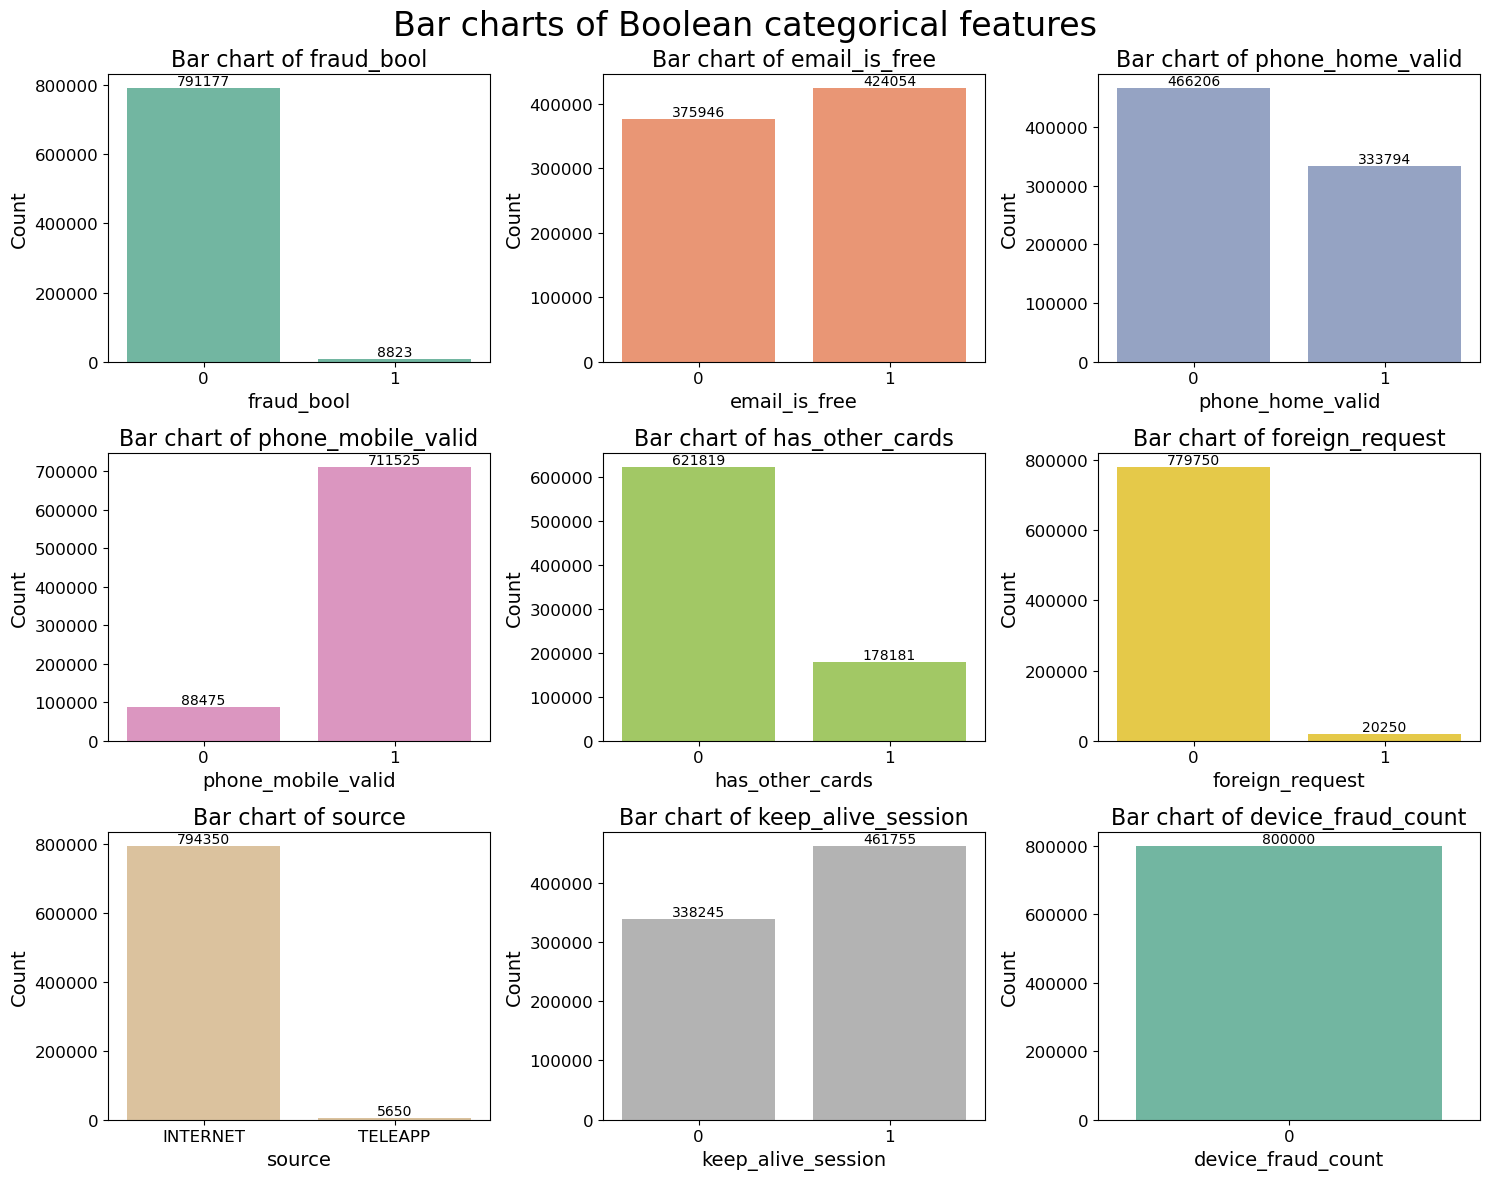

In [ ]:
# Define color palette for better visual distinction
color_palette = sns.color_palette("Set2", n_colors=len(bool_df.columns))

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i in range(len(bool_df.columns)):
    feature_name = bool_df.columns[i]
    sns.countplot(x=bool_df[feature_name], ax=axes[i], palette=[color_palette[i]])

    axes[i].set_title(f"Bar chart of {feature_name}", fontsize=16)
    axes[i].tick_params(axis='x', labelsize=12, rotation=0)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_xlabel(feature_name, fontsize=14)
    axes[i].set_ylabel("Count", fontsize=14)

    # Annotate bars with count values for clarity
    for p in axes[i].patches:
        count = int(p.get_height())
        axes[i].annotate(f'{count}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', fontsize=10, color='black', 
                         xytext=(0, 5), textcoords='offset points')
    
    # Print the count distribution for each feature
    print(f"Counts for {feature_name}:")
    print(bool_df[feature_name].value_counts())
    print("\n" + "-"*40)

fig.suptitle('Bar charts of Boolean categorical features', fontsize=24)
plt.tight_layout()
plt.show()


In analyzing boolean features, our approach centers on plotting the counts for each binary category rather than seeking outliers, as boolean data inherently lacks the continuous variability that would yield extreme or unusual values. Each boolean feature in this dataset represents a yes/no or true/false condition, like whether an email is free or paid (email_is_free feature), if a phone number is valid (phone_home_valid, phone_mobile_valid), or if a transaction is a foreign_request. Given this structure, looking at counts of 0s and 1s offers insights into the feature distribution and relationship to fraud, especially since boolean features often indicate the presence or absence of specific risk factors. Subsequently, for this type of data, summary statistics like the mean would simply represent the proportion of 1s within each feature, while the standard deviation would indicate the variability around this proportion—but neither provides the interpretive depth needed for boolean analysis.

The code above calculates and visualizes the frequency of 0s and 1s for each boolean feature, showing how prevalent each condition is in our dataset. For instance, the counts reveal that phone_mobile_valid has a high count of 1s, while device_fraud_count is consistently 0 across the dataset, which can indicate patterns or anomalies in data collection. Such trends could signal patterns: a feature with a majority of 1s may suggest a common characteristic in the data, while features with many 0s, like foreign_request, might indicate special cases that could be strongly associated with fraud.

Now, we need to compare each feature directly against the target variable (fraud_bool). By visualizing the fraud frequency for each boolean feature, we can explore potential correlations, such as whether cases with foreign_request = 1 align with a higher fraud rate. This will enable us to quickly evaluate which binary features might have a predictive relationship with fraud and merit our feature selection and data pre-processing.

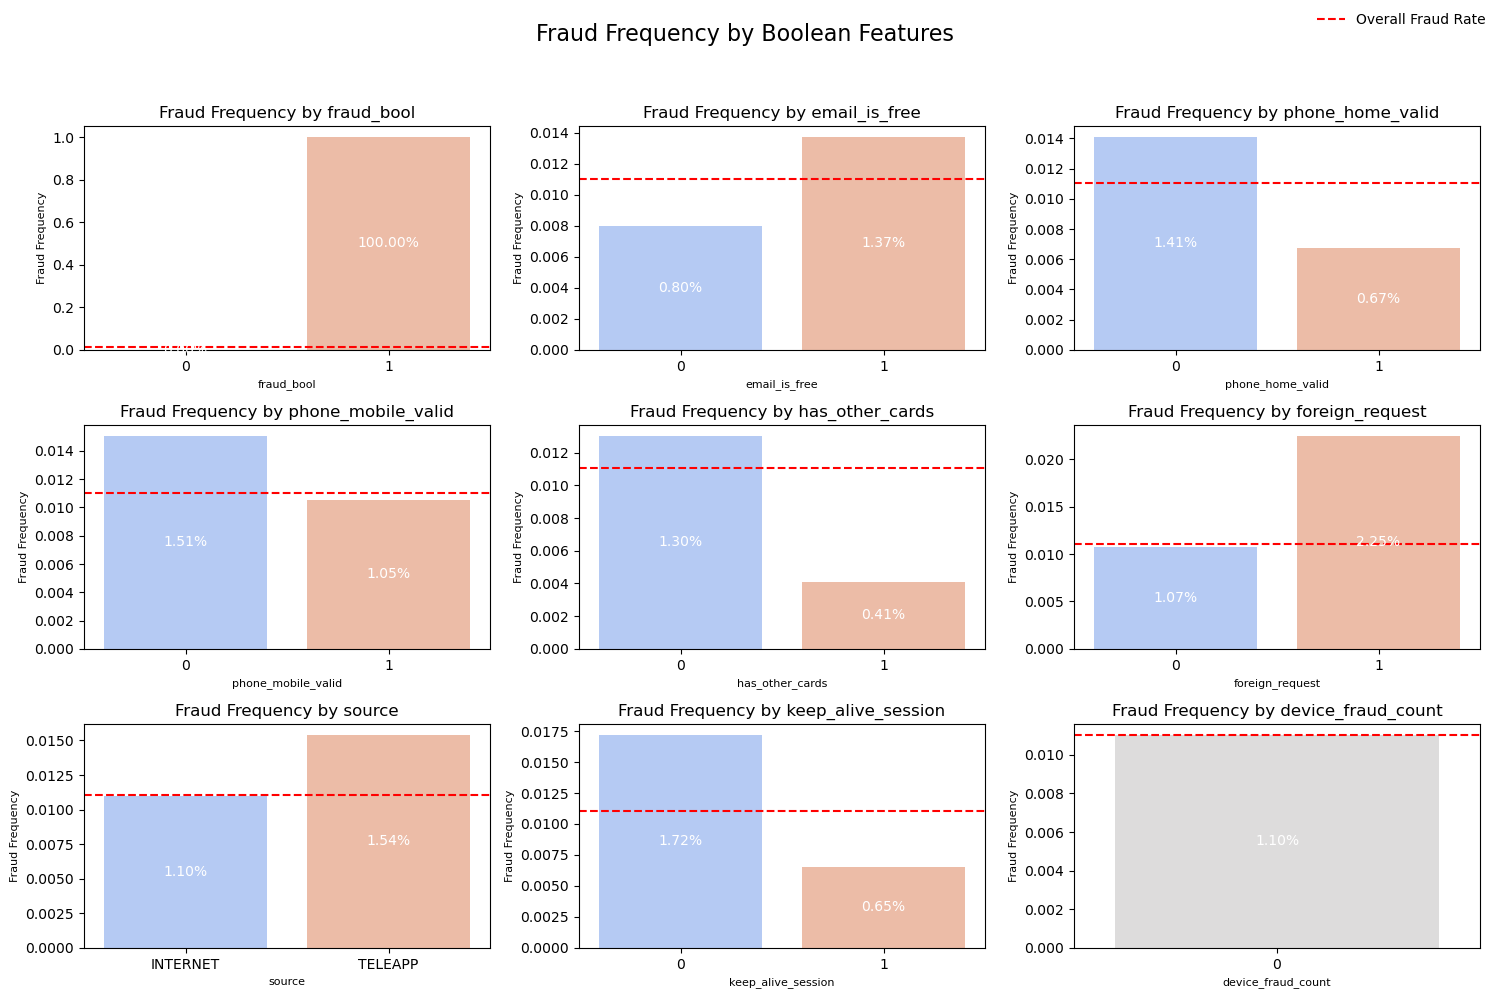

In [ ]:
new_df = bool_df.copy()
new_df['fraud_bool'] = train_df['fraud_bool']

overall_fraud_rate = train_df['fraud_bool'].mean()  # Mean fraud rate

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(bool_df.columns):
    fraud_frequency = new_df.groupby(feature)['fraud_bool'].mean().reset_index(name='fraud_frequency')
    sns.barplot(
        x=feature, y='fraud_frequency', data=fraud_frequency,
        palette='coolwarm', ax=axes[i]
    )
    axes[i].set_title(f"Fraud Frequency by {feature}", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=8)
    axes[i].set_ylabel('Fraud Frequency', fontsize=8)

    line = axes[i].axhline(y=overall_fraud_rate, color='red', linestyle='--', linewidth=1.5)

    # Annotate bars with fraud frequency values inside the bars
    for p in axes[i].patches:
        freq = p.get_height()
        axes[i].annotate(f'{freq:.2%}',  # Format as percentage
                         (p.get_x() + p.get_width() / 2., freq / 2),  # Position inside the bar
                         ha='center', va='center', fontsize=10, color='white')

fig.legend([line], ['Overall Fraud Rate'], loc='upper right', fontsize=10, frameon=False)
fig.suptitle('Fraud Frequency by Boolean Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
#drop device_fraud_count because its constant
bools_df = bool_df.drop('device_fraud_count', axis=1)
bools_df.nunique()

#convert source feature internet/teleapp to boolean
# 1 for internet, 0 for teleapp
internet_count = bools_df['source'].value_counts().get('INTERNET', 0)
teleapp_count = bools_df['source'].value_counts().get('TELEAPP', 0)
print(internet_count, teleapp_count)

794350 5650


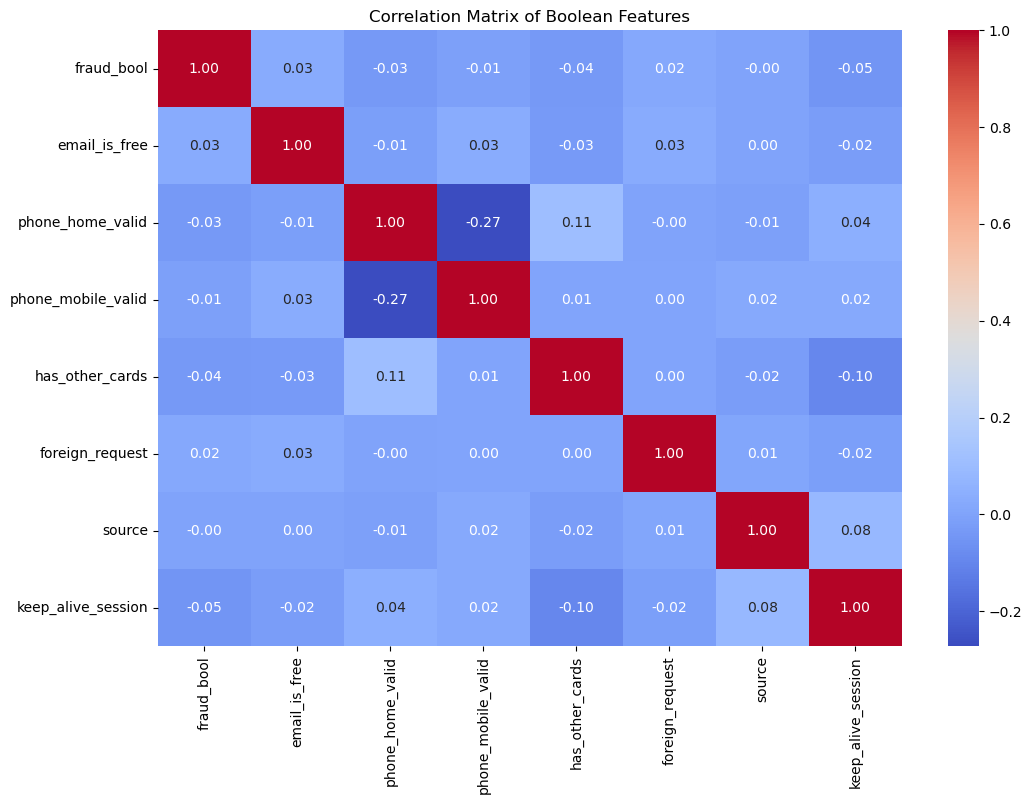

In [ ]:
#we convert sources colums to 1 for internet and 0 for teleapp
bools_df['source'] = bools_df['source'].replace({'INTERNET': 1, 'TELEAPP': 0})
# Correlation matrix for boolean features
plt.figure(figsize=(12, 8))
sns.heatmap(bools_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Boolean Features")
plt.show()

The only notable correlation we see is a negative relationship between phone_mobile_valid and phone_home_valid. The relationship most likely explains it self since for those with a mobile phone they are less likely to have a home phone since they already have a mobile phone and vice versa. But the correlation between the two isnt high enough to remove either feature and the rest of the data doesnt reveal much either suggesting that all boolean feature are likely to be independant.

Given the imbalanced nature of many boolean features in the dataset, relying on correlation may not be effective. Instead, statistical tests like the chi-squared test and p-value would better assess the relationships between these categorical variables. These tests account for the distribution of values and can highlight dependencies that correlation might overlook, especially when the categories are unevenly distributed. This approach is more suitable for drawing meaningful conclusions from categorical data.

In [ ]:
# Calculate null hypothesis
null_counts = train_df['fraud_bool'].value_counts()
null_total = null_counts.sum()
null_fraud = null_counts.get(1, 0)
null_p = null_fraud / null_total


# Initialize dataframe list
results = [{
    'Part of dataframe': 'Null hypothesis',
    'Probability of fraud': null_p,
    'Number of observations': null_total,
    'P-value': 1
}]


# Loop over conditions to compute probabilities and p-values
for feature in bools_df.columns:
    condition = bools_df[feature] == True
    description = f"{feature} is True"
    subset = train_df[condition]
    subset_counts = subset['fraud_bool'].value_counts()
    subset_total = subset_counts.sum()
    subset_fraud = subset_counts.get(1, 0)
    
    if subset_fraud > 0:
        subset_p = subset_fraud / subset_total
        p_value = sm.stats.proportions_ztest([null_fraud, subset_fraud], [null_total, subset_total])[1]
    else:  
        subset_p = 0
        p_value = None
    
    results.append({
        'Part of dataframe': description,
        'Probability of fraud': subset_p,
        'Number of observations': subset_total,
        'P-value': p_value
    })
results.pop(1)
# Create and print hypothesis dataframe
hypothesis_df = pd.DataFrame(results)
hypothesis_df.style.format({'P-value': '{:.2e}'}).hide(axis='index')

Part of dataframe,Probability of fraud,Number of observations,P-value
Null hypothesis,0.011029,800000,1.00e+00
email_is_free is True,0.013725,424054,5.99e-39
phone_home_valid is True,0.006741,333794,2.17e-99
phone_mobile_valid is True,0.010528,711525,2.94e-03
has_other_cards is True,0.004097,178181,1.77e-159
foreign_request is True,0.022469,20250,3.36e-52
source is True,0.010998,794350,8.51e-01
keep_alive_session is True,0.006523,461755,3.90e-141


The probabilty of foreign_request is abonoramlly high and we can say that it is significant given its p-value, there is likely a strong connection between a foreign request and the possibilty of fraud. We could consider the features: email_is_free, phone_home_valid, has_other_cards, foreign_requests, and keep_alive_session as features to futher look into. 

In [ ]:
from scipy.stats import chi2_contingency

# Dictionary to store chi-squared test results
chi2_results = {}

for feature in bool_df:
    contingency_table = pd.crosstab(train_df[feature], train_df['fraud_bool'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = {'chi2_stat': chi2, 'p_value': p}

chi2_results_df = pd.DataFrame(chi2_results).T
print("Chi-Squared Test Results:\n", chi2_results_df)


Chi-Squared Test Results:
                         chi2_stat        p_value
fraud_bool          799908.319368   0.000000e+00
email_is_free          600.770822  1.137992e-132
phone_home_valid       964.939465  7.504099e-212
phone_mobile_valid     147.439401   6.290380e-34
has_other_cards       1009.059637  1.927685e-221
foreign_request        248.230044   6.314100e-56
source                   9.561013   1.987534e-03
keep_alive_session    2031.876479   0.000000e+00
device_fraud_count       0.000000   1.000000e+00


The Chi-Squared test here was performed to assess the dependency of each boolean feature on the target variable, fraud_bool. Features with a high Chi-Squared statistic and a very low p-value have a significant association with fraud, indicating they might be valuable predictors. 

email_is_free has a significant Chi-squared statistic and p-value, indicating a strong association with fraud. This is important for exploring the distribution of fraud across the email_is_free categories to identify any patterns, especially in conjunction with other high-risk variables like foreign_request. The feature phone_mobile_valid has a moderate yet significant association with fraud, though it’s weaker than phone_home_valid, which shows a high Chi-squared value, suggesting that the validity correlates significantly with fraud risk. The has_other_cards feature has one of the highest Chi-squared statistics, therefore, users with multiple cards have a substantially higher likelihood of fraud. The foreign_request feature has a moderate Chi-squared statistic, indicating a significant, though not extreme, relationship with fraud. From the graph, we see that the fraud frequency for foreign_request = 1 is significantly high. Therefore, this feature can be combined for better insight. 

The source feature has a relatively low Chi-squared value and a moderately significant p-value, suggesting it is weakly associated with fraud. While most boolean features are already binary, source is a categorical feature with two classes. We can implement one-hot encoding for this feature to allow for clear modeling input without introducing ordinal bias. Additionaly, exploring combinations, such as interactions between foreign_request, source, and other fraud indicators may reveal insights into fraud patterns across different conditions. However, if no strong associations emerge, this feature might be dropped during feature selection to avoid model complexity.

For keep_alive_session, the high Chi-squared value and p-value indicate a strong link between extended session durations and fraud. This feature can be further analyzed, especially to see if long sessions correlate with other high-risk features such as foreign_request. Lastly, device_fraud_count has a Chi-squared value of zero, suggesting no association with fraud. This lack of association implies it may not add predictive value to the model. 


For feature selection, we will retain features with strong associations to fraud and drop or combine weaker predictors. Since binary features generally don’t require scaling, they can move directly into modeling, though combining weaker features may enhance their predictive utility. With this strategy, we can optimize the dataset for fraud prediction while reducing unnecessary complexity.

### Summary of feature transformations for boolean features

fraud_bool
- Retain as it is the target variable

email_is_free
- Retain

phone_home_valid and phone_mobile_valid
- total_valid_phones which counts valid phone numbers (0, 1, or 2) by combining phone_home_valid and phone_mobile_valid.

has_other_cards
- Retain

foreign_request and keep_alive_session
- Combined feature foreign_long_session to check for long session times from foreign locations which might indicate unusual behavior, like accessing accounts from unfamiliar regions.

source
- One-hot encoding

device_fraud_count and keep_alive_session
- Combine to create a flag that captures both device history and session longevity, potentially signaling abnormal use patterns.

total_risk_flags
- A derived aggregated fraud risk score using high-risk indicators (email_is_free, foreign_request, has_other_cards, and keep_alive_session)

## 4.1 Conclusion

#### **Numerical Features**

The numerical features contain seven different variables:
- `name_email_similarity`       
- `days_since_request`          
- `intended_balcon_amount`     
- `velocity_6h`                 
- `velocity_24h`                
- `velocity_4w`                
- `session_length_in_minutes`  

The numerical features categorized by float64 values made up of many (>500,000 unique values) each with numerous missing values in the dataset that we need to handle appropriately. Potential solutions for handling missing values include manually imputing missing values, removing outliers, transforming the data to normalize skewness, or deprioritizing features with near-zero correlation.

After visualizing the numerical features, we highlight these key takeaways:

1. **Strong Predictors**:
   - `name_email_similarity` (best class separation)
   - `velocity_4w` (distinct cyclical patterns)
   - `velocity_6h` (some separation in distributions)

2. **Class Imbalance**:
   - Visible in all distributions
   - Non-fraud class significantly larger
   - Particularly evident in the `name_email_similarity` distribution

3. **Interaction Effects to Consider**:
   - Relationship between different velocity windows
   - Combination of `name_email_similarity` with `session_length`
   - Patterns in `intended_balcon_amount` with velocity metrics
   - Time-based patterns in request delays

4. **Data Quality Notes**:
   - Significant number of missing values in `intended_balcon_amount`
   - Potential outliers in all velocity metrics
   - Extreme values observed in `session_length`
   - Some negative values in velocity metrics that need to be capped

We analyze the correlation of the numerical features by running a null hypothesis test to determine whether possible transformations will be useful. A p-test is conducted to conclude if the means are significantly different. After running the test, we find that positive accounts in `intended_balcon_amount` have strong statistical significance, with a p-value of 1.35e-137. The features `days_since_request` and `session_length` also have low p-values, so we may consider excluding or deprioritizing them.

After analyzing the correlation matrix of the numerical features, we find a moderate correlation between `velocity_6h`, `velocity_24h`, and `velocity_4w`, while the remaining features appear to be independent.

In conclusion, we suggest the following transformations and preprocessing steps for the numerical features:

1. **Name Email Similarity**
   - Create four bins with size 0.24 and one bin with size 0.04 between 0-1.
   - Use ordinal encoding.

2. **Days Since Request**
   - Apply log transformation and remove outliers after standard scaling.

3. **Intended Balcon Amount** (74.23% missing)
   - Impute missing values (-1) to 0.
   - Create `MISSING_FLAG_intended_balcon_amount` to indicate missing values.
   - Apply log transformation and remove outliers after standard scaling.

4. **Velocity Metrics**
   - **Velocity 6h**: Impute negative values with 0. Standard scale.
   - **Velocity 24h**: Standard scale.
   - **Velocity 4w**: Remove feature.

5. **Session Length in Minutes**
   - Remove feature.

### **High-Cardinality Categorical Features**

The high-cardinality categorical features consist of seven different features:
- `prev_address_months_count`
- `current_address_months_count`
- `zip_count_data`
- `bank_branch_count_8w`
- `date_of_birth_distinct_emails_4w`
- `credit_risk_score`
- `bank_months_count`

The categorical features are divided into two groups: high-cardinality and low-cardinality features. High-cardinality features have more than 12 unique values, while low-cardinality features have 12 or fewer unique values. From our analysis of the high-cardinality features, we believe that `credit_risk_score` and `date_of_birth_distinct_emails_4w` are the most useful for predictive modeling because they have the highest absolute cardinalities compared to the other high-cardinality features. Features with high missing data, such as `prev_address_months_count`, will likely require imputation before they are usable, while those with near-zero correlation, like `zip_count_4w`, could be deprioritized or removed.
From our correlation analysis of the high-cardinality categorical data, we find that none of the features display high correlations, though there is moderate overlap between the address-related features, which could be considered for potential feature engineering or transformation. We also find:

- `current_address_months_count` and `prev_address_months_count` show a moderate negative correlation (-0.27), which could indicate some degree of overlap in terms of residency history.
- `credit_risk_score` has weak correlations with most other features, suggesting it may provide unique information for model inputs.
- `zip_count_4w`, `bank_branch_count_8w`, and `bank_months_count` also have weak correlations with other features, suggesting they may provide unique information for model inputs.

In conclusion, we suggest the following transformations and preprocessing steps for the high-cardinality categorical features:

1. **Missing Values**
   - Impute missing values with `-1`, and create missing flags for features with high missingness rates.

2. **Outlier Management**
   - Apply outlier treatment for features with high outlier counts, especially those with relatively higher correlations (e.g., `credit_risk_score` and `date_of_birth_distinct_emails_4w`).

3. **Feature Selection**
   - Consider deprioritizing features with low correlation and high missingness or outliers, such as `zip_count_4w` and `prev_address_months_count`.
   - Retain `credit_risk_score` and `date_of_birth_distinct_emails_4w` due to their relatively higher correlations with the target.

### **Low-Cardinality Categorical Features**

The low-cardinality categorical features consist of nine different features:
- `customer_age`
- `payment_type`
- `employment_status`
- `housing_status`
- `device_os`
- `device_distinct_emails_8w`
- `month`
- `income`
- `proposed_credit_limit`

The low-cardinality categorical features are made up of categorical features with 12 or fewer unique values. Features such as `customer_age`, `income`, and `proposed_credit_limit` show a mostly consistent linear relationship with fraud frequency. Features such as `payment_type` and `employment_status` reveal specific high-risk categories where certain categories display a significantly higher rate of fraud.

In conclusion, we suggest the following transformations and preprocessing steps for the low-cardinality categorical features:

1. **customer_age**: Use ordinal encoding due to a clear linear relationship where higher ages correlate with higher fraud risk.

2. **payment_type** & **employment_status**: Apply one-hot encoding and keep all categories, as they show distinct risk profiles.

3. **device_os**: Use one-hot encoding to capture modest but important differences in risk levels between operating systems.

4. **month**: Apply one-hot encoding to preserve potential seasonal patterns.

5. **income** & **proposed_credit_limit**: Create bins to capture the U-shaped relationship, then apply one-hot encoding. Monitor for potential multicollinearity between these features.

6. **device_distinct_emails_8w**: Keep as a numeric feature with no transformation needed (transform separately).

### **Boolean Features**

The boolean features consist of nine different features:
- `fraud_bool`
- `email_is_free`
- `phone_home_valid`
- `phone_mobile_valid`
- `has_other_cards`
- `foreign_request`
- `source`
- `keep_alive_session`
- `device_fraud_count`

For boolean features, we focus on count distributions rather than outliers, as these data represent binary yes/no conditions, such as `email_is_free` or `foreign_request`. Counting 0s and 1s reveals distribution patterns and potential fraud correlations. We visualize the counts of each boolean feature and compare that with the frequency of fraud for each 0/1. From observation, almost all of the features have a 0/1 condition that has a more frequent amount of fraud compared to the base fraud of the dataset, but without further analysis, we cannot tell if this is significant or not. We conduct p and chi-squared tests to determine the significance of our results. After analysis of the boolean features with p and chi-squared tests, we find a strong association with fraud in many of the features, such as `email_is_free`, `foreign_request`, and `keep_alive_session`.

In conclusion, we suggest the following transformations and preprocessing steps for the boolean features:

1. **fraud_bool**: Retain as it is the target variable.

2. **email_is_free**: Retain.

3. **phone_home_valid** and **phone_mobile_valid**: Create `total_valid_phones`, which counts valid phone numbers (0, 1, or 2) by combining `phone_home_valid` and `phone_mobile_valid`.

4. **has_other_cards**: Retain.

5. **foreign_request** & **keep_alive_session**: Combine into a feature `foreign_long_session` to check for long session times from foreign locations, which might indicate unusual behavior, like accessing accounts from unfamiliar regions.

6. **source**: Apply one-hot encoding.

7. **device_fraud_count** & **keep_alive_session**: Combine to create a flag that captures both device history and session longevity, potentially signaling abnormal use patterns.

8. **total_risk_flags**: Derive an aggregated fraud risk score using high-risk indicators (`email_is_free`, `foreign_request`, `has_other_cards`, and `keep_alive_session`).